In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# 设置绘图
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 10
sns.set_palette("husl")

# 加载数据
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# 特征分类
binary_features = [col for col in train_df.columns if '_bin' in col]
categorical_features = [col for col in train_df.columns if '_cat' in col]
calc_features = [col for col in train_df.columns if '_calc' in col and '_bin' not in col]
continuous_features = [col for col in train_df.columns 
                      if col not in binary_features + categorical_features + 
                      calc_features + ['id', 'target']]

# 打印基本信息
print("数据集基本信息:")
print(f"Dataset shape: {train_df.shape}")

print("\nFeature counts:")
print(f"Binary features: {len(binary_features)}")
print(f"Categorical features: {len(categorical_features)}")
print(f"Calculated features: {len(calc_features)}")
print(f"Continuous features: {len(continuous_features)}")

print("训练集数据类型:")
print(train_df.dtypes)

数据集基本信息:
Dataset shape: (595212, 59)

Feature counts:
Binary features: 17
Categorical features: 14
Calculated features: 14
Continuous features: 12
训练集数据类型:
id                  int64
target              int64
ps_ind_01           int64
ps_ind_02_cat       int64
ps_ind_03           int64
ps_ind_04_cat       int64
ps_ind_05_cat       int64
ps_ind_06_bin       int64
ps_ind_07_bin       int64
ps_ind_08_bin       int64
ps_ind_09_bin       int64
ps_ind_10_bin       int64
ps_ind_11_bin       int64
ps_ind_12_bin       int64
ps_ind_13_bin       int64
ps_ind_14           int64
ps_ind_15           int64
ps_ind_16_bin       int64
ps_ind_17_bin       int64
ps_ind_18_bin       int64
ps_reg_01         float64
ps_reg_02         float64
ps_reg_03         float64
ps_car_01_cat       int64
ps_car_02_cat       int64
ps_car_03_cat       int64
ps_car_04_cat       int64
ps_car_05_cat       int64
ps_car_06_cat       int64
ps_car_07_cat       int64
ps_car_08_cat       int64
ps_car_09_cat       int64
ps_car_10_ca

# 1.1 目标变量分析


目标变量分析:

Target Distribution:
target
0    573518
1     21694
Name: count, dtype: int64

Target Percentage:
target
0    0.963552
1    0.036448
Name: proportion, dtype: float64


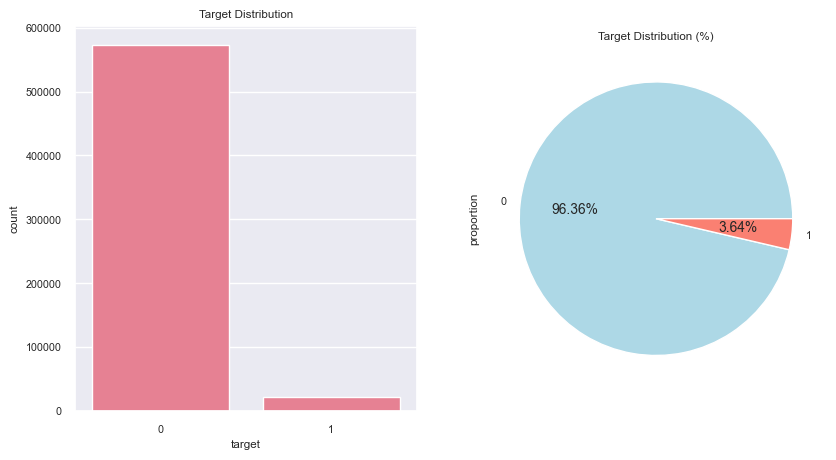

In [35]:
def analyze_target_distribution(df):
    """分析目标变量分布"""
    fig = plt.figure(figsize=(15, 5))
    
    # 计数图
    plt.subplot(131)
    sns.countplot(data=df, x='target')
    plt.title('Target Distribution')
    
    # 饼图
    plt.subplot(132)
    df['target'].value_counts(normalize=True).plot(
        kind='pie', autopct='%.2f%%',
        colors=['lightblue', 'salmon']
    )
    plt.title('Target Distribution (%)')
    
    # 打印具体数值
    print("\nTarget Distribution:")
    print(df['target'].value_counts())
    print("\nTarget Percentage:")
    print(df['target'].value_counts(normalize=True))

# 执行目标变量分析
print("\n目标变量分析:")
analyze_target_distribution(train_df)

# 1.2 缺失值分析


缺失值分析:


<Figure size 1500x600 with 0 Axes>

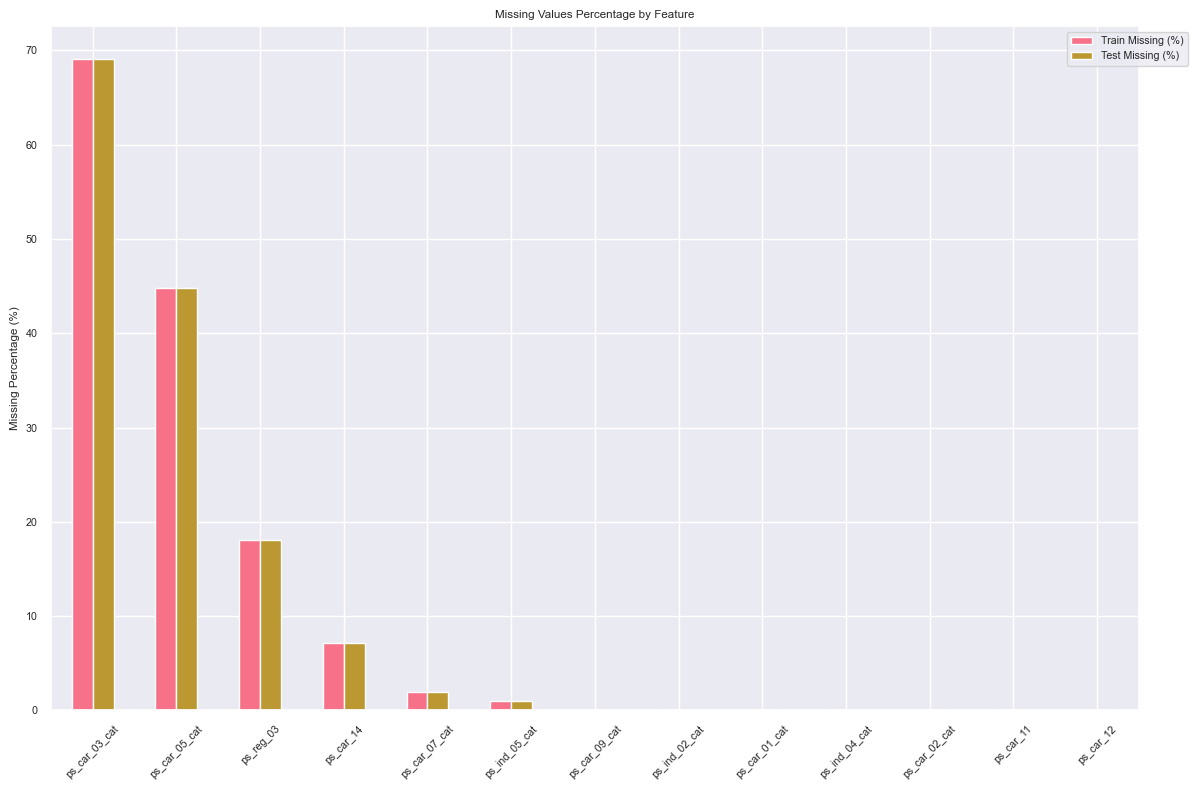


Features with missing values:
               Train Missing (%)  Test Missing (%)
ps_car_03_cat          69.089837         69.097216
ps_car_05_cat          44.782531         44.842274
ps_reg_03              18.106490         18.109442
ps_car_14               7.160474          7.146489
ps_car_07_cat           1.930237          1.941161
ps_ind_05_cat           0.975955          0.975565
ps_car_09_cat           0.095596          0.098229
ps_ind_02_cat           0.036290          0.034386
ps_car_01_cat           0.017977          0.017921
ps_ind_04_cat           0.013945          0.016241
ps_car_02_cat           0.000840          0.000560
ps_car_11               0.000840          0.000112
ps_car_12               0.000168          0.000000


In [36]:
def analyze_missing_values(train_df, test_df):
    """分析缺失值"""
    # 计算缺失值的百分比
    missing_train = (train_df == -1).sum() / len(train_df) * 100  # 百分比
    missing_test = (test_df == -1).sum() / len(test_df) * 100  # 百分比
    
    # 创建缺失值 DataFrame
    missing_df = pd.DataFrame({
        'Train Missing (%)': missing_train,
        'Test Missing (%)': missing_test
    }).sort_values('Train Missing (%)', ascending=False)
    
    # 只显示有缺失值的特征
    missing_df = missing_df[
        (missing_df['Train Missing (%)'] > 0) | 
        (missing_df['Test Missing (%)'] > 0)
    ]
    
    # 绘制缺失值百分比的柱状图
    plt.figure(figsize=(15, 6))
    missing_df.plot(kind='bar')
    plt.title('Missing Values Percentage by Feature')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()
    
    # 打印缺失值百分比
    print("\nFeatures with missing values:")
    print(missing_df)

# 执行缺失值分析
print("\n缺失值分析:")
analyze_missing_values(train_df, test_df)

# 1.3 特征相关性分析


特征相关性分析:
Binary Features Correlation


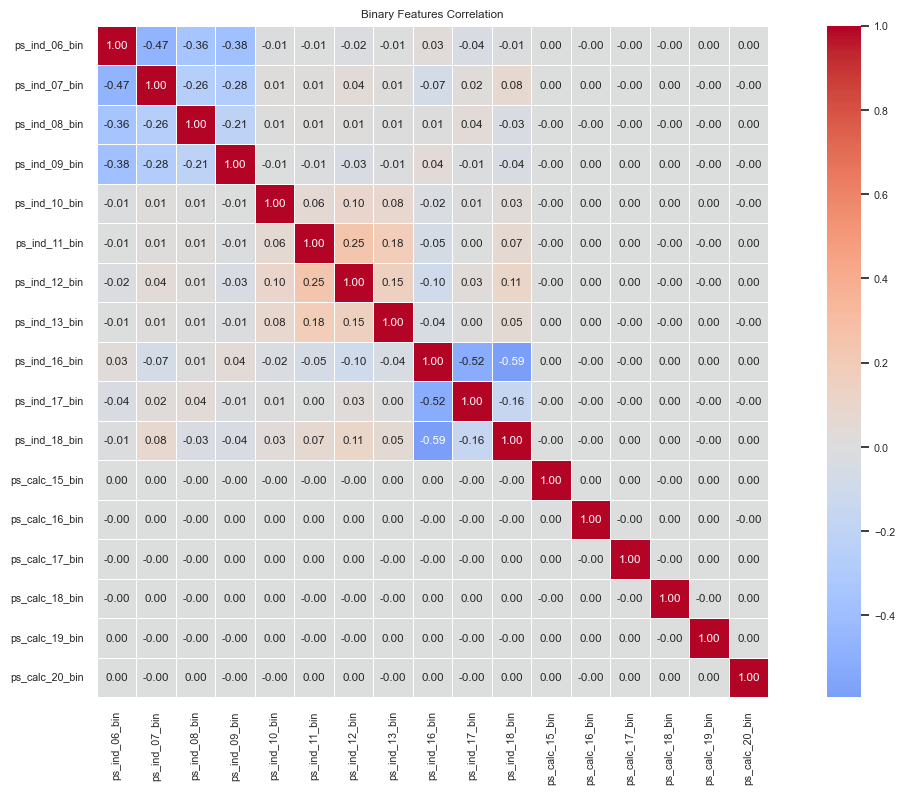


Categorical Features Correlation


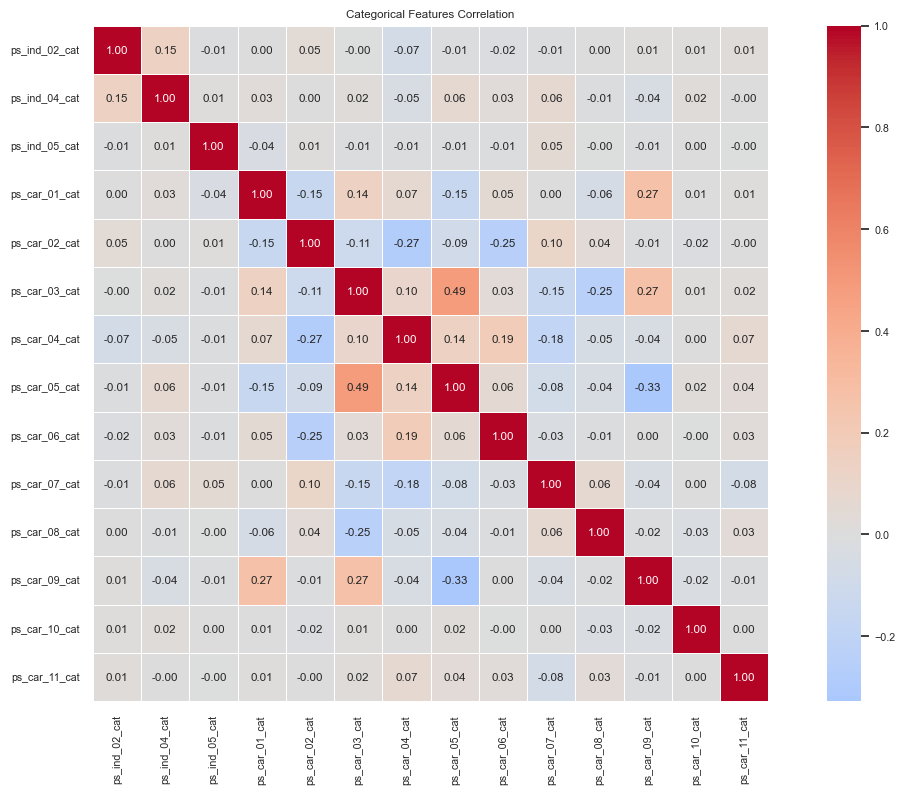

In [37]:
def plot_correlation_matrix(df, features, title, figsize=(12, 8), font_scale=0.7):
    """绘制相关性矩阵"""
    plt.figure(figsize=figsize)
    sns.set(font_scale=font_scale)
    
    corr_matrix = df[features].corr()
    
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        center=0,
        square=True,
        linewidths=0.5,

    )
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

# 执行相关性分析
print("\n特征相关性分析:")
print("Binary Features Correlation")
plot_correlation_matrix(train_df, binary_features, "Binary Features Correlation")

print("\nCategorical Features Correlation")
plot_correlation_matrix(train_df, categorical_features, "Categorical Features Correlation")


# 1.4 特征分布分析


特征分布分析:
Binary Features Distribution


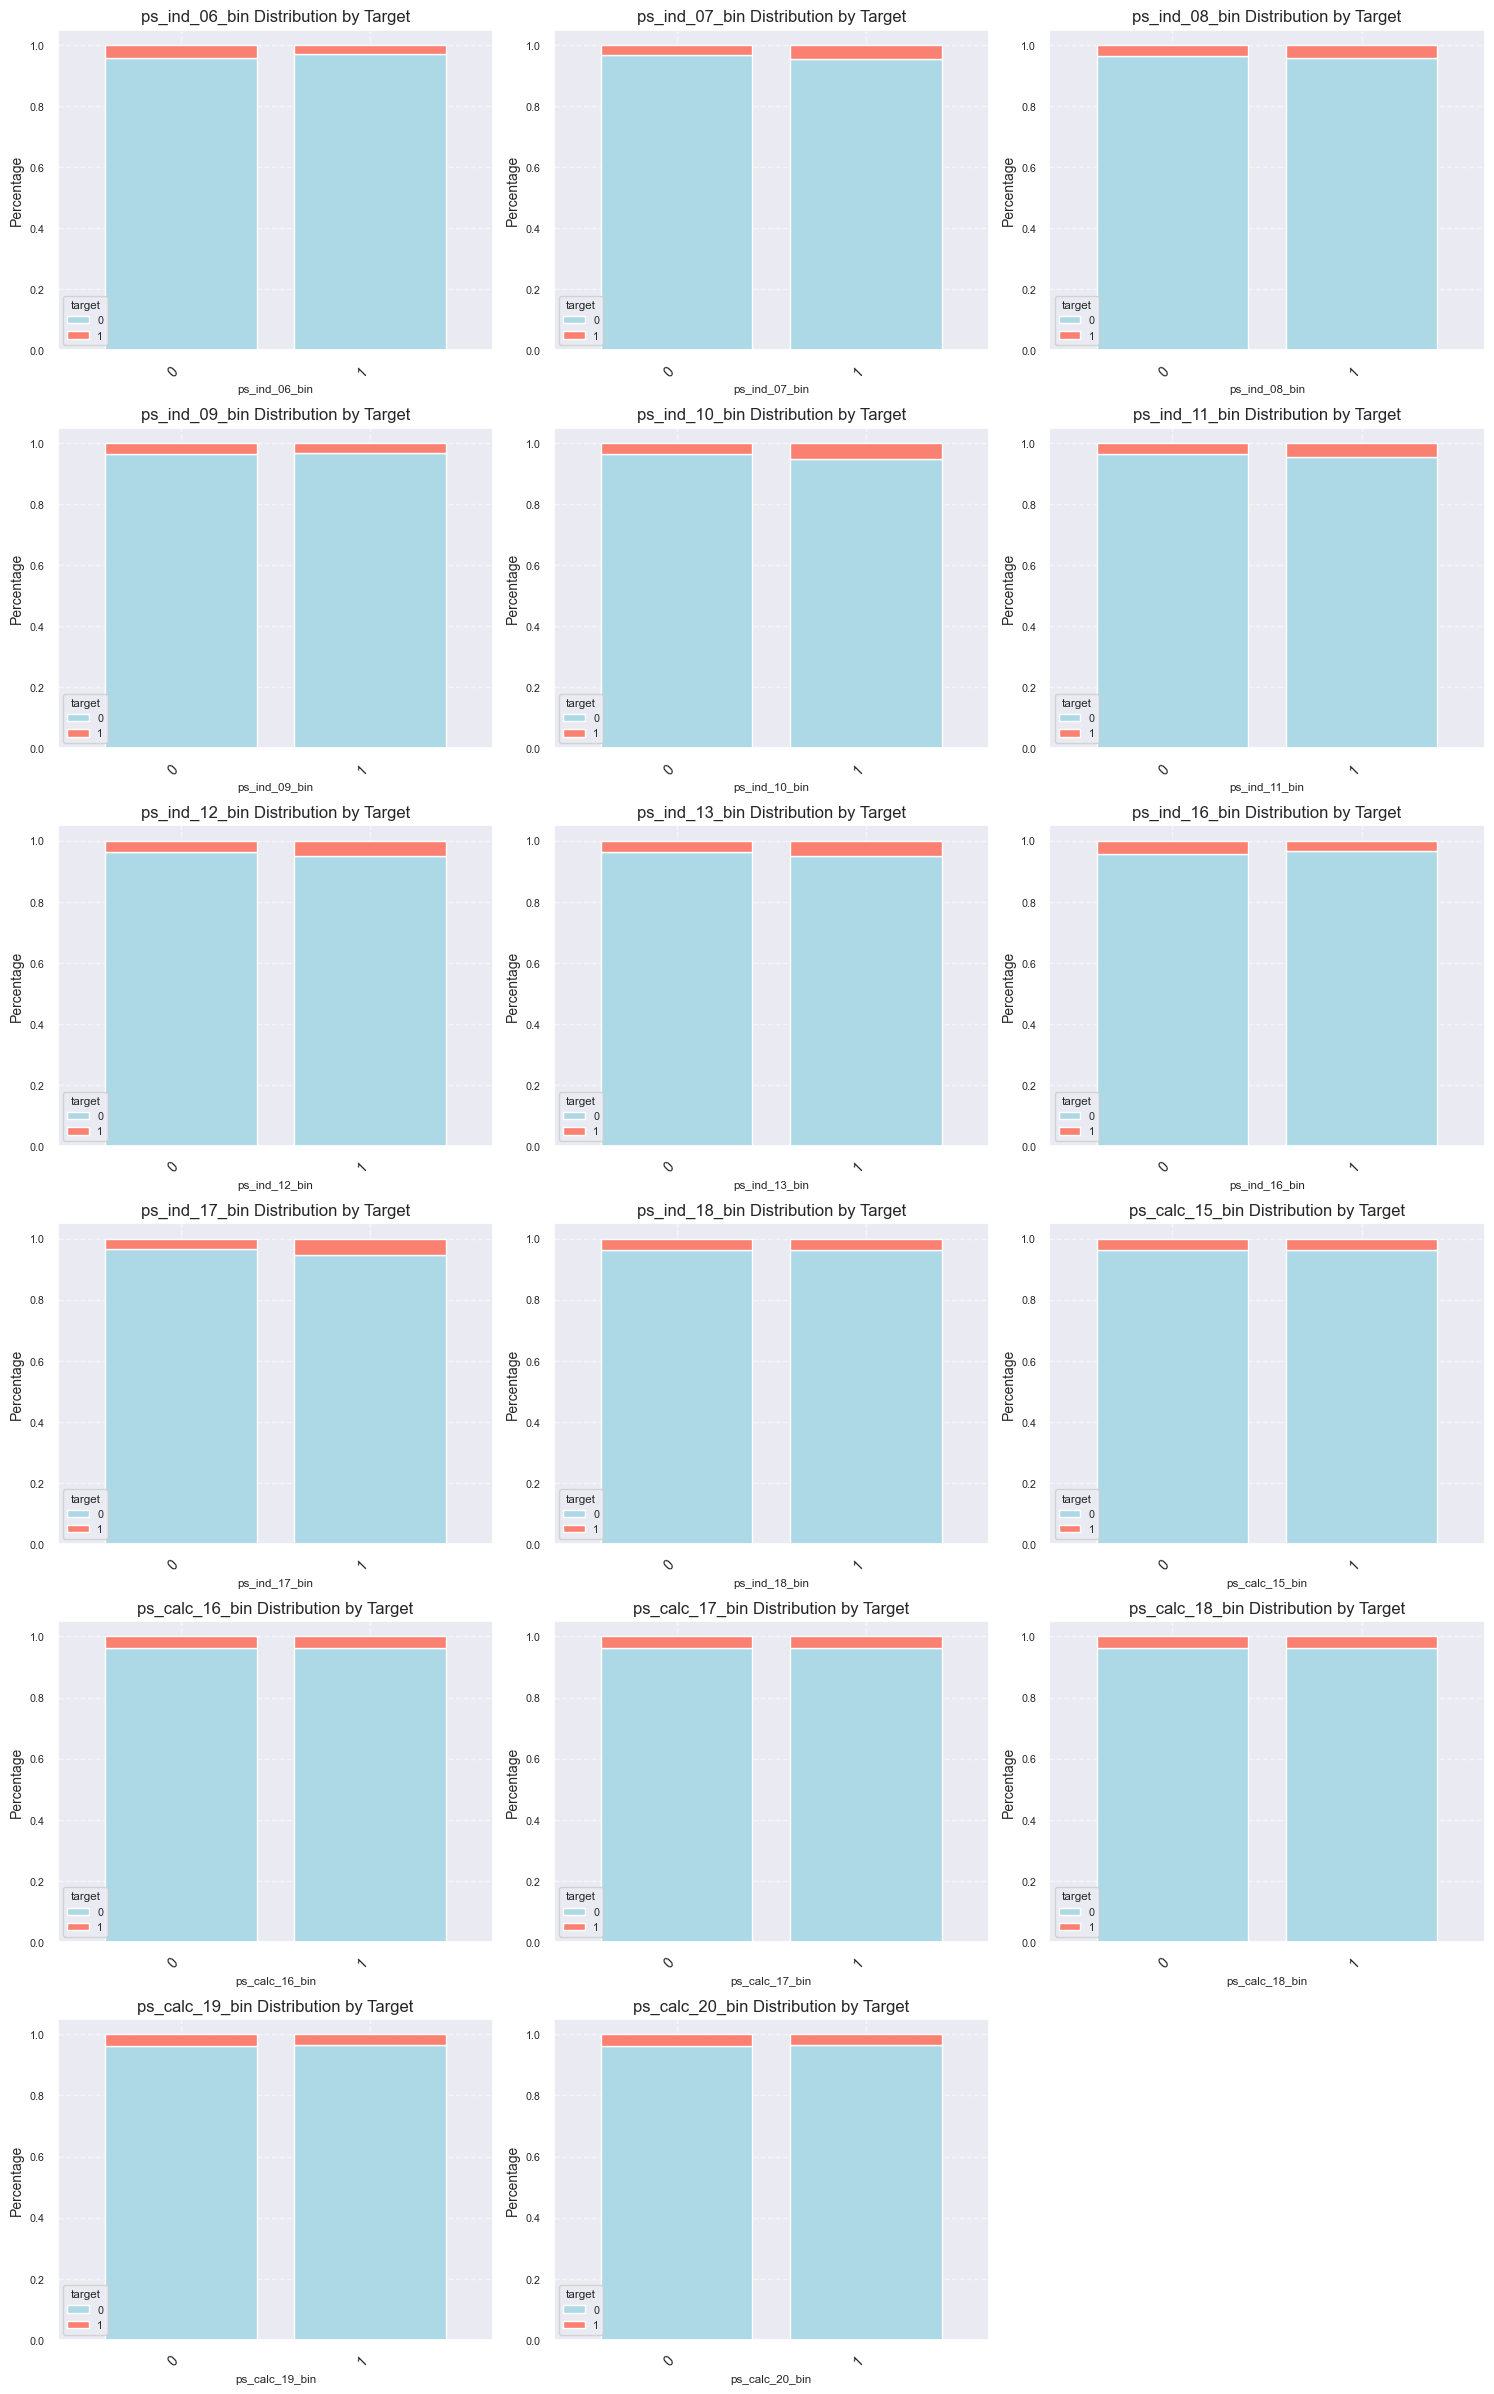


Categorical Features Distribution (excluding ps_car_11_cat)


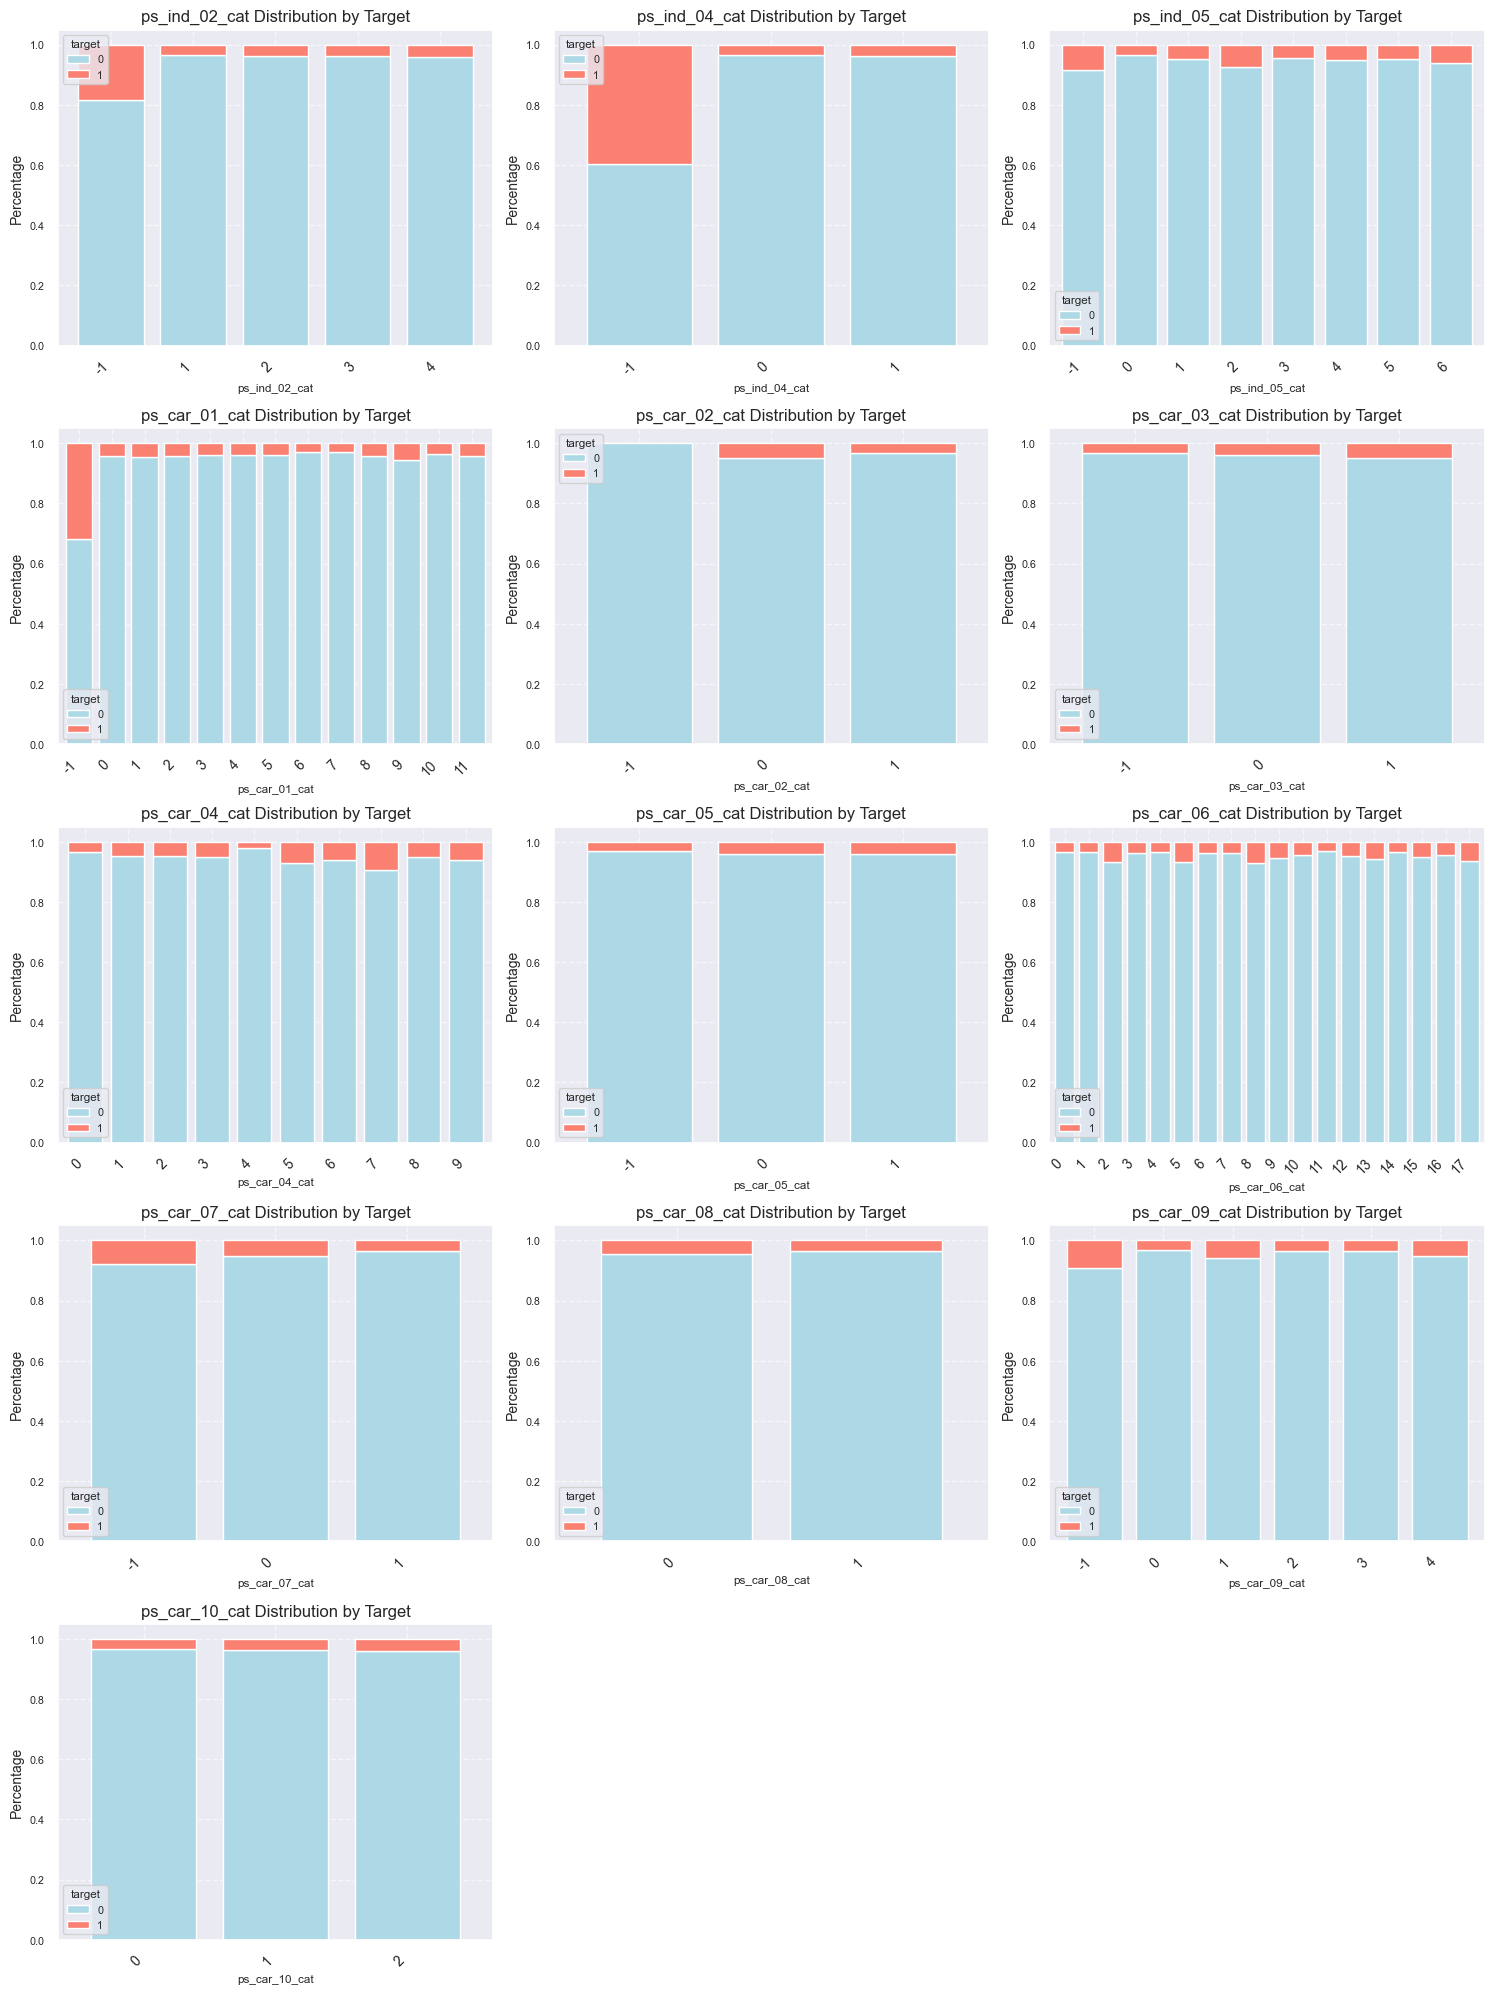


绘制 ps_car_11_cat 特征分布:


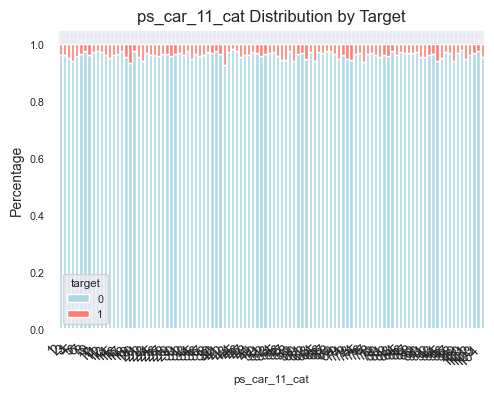

In [38]:
def analyze_feature_distributions(df, features, feature_type, ncols=3, single_feature=None):
    """分析特征分布并优化绘图"""
    
    # 如果指定了 single_feature，只绘制该特征
    if single_feature is not None:
        features = [single_feature]
        ncols = 1  # 单独显示时，调整为一列
    
    nrows = (len(features) - 1) // ncols + 1
    
    # 调整图表大小
    if single_feature == 'ps_car_11_cat':
        fig = plt.figure(figsize=(15, 6))  # 调整为更合理的宽度
    else:
        fig = plt.figure(figsize=(ncols * 5, nrows * 4))
    
    for i, feature in enumerate(features, 1):
        if feature == single_feature:  # 对单独特征做特殊处理
            # 使用 ax 单独绘制特定特征
            ax = fig.add_subplot(111)  # 直接使用一个子图
            df_temp = pd.crosstab(
                df[feature], 
                df['target'], 
                normalize='index'
            )
            df_temp.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'salmon'], width=0.8)
            ax.set_title(f'{feature} Distribution by Target', fontsize=14)
            ax.set_ylabel('Percentage', fontsize=12)
            ax.set_xticks(range(len(df_temp.index)))
            ax.set_xticklabels(df_temp.index, rotation=45, ha='right', fontsize=10)
        else:
            plt.subplot(nrows, ncols, i)  # 对其他特征使用常规处理
            if feature_type in ['binary', 'categorical']:
                # 堆叠条形图
                df_temp = pd.crosstab(
                    df[feature], 
                    df['target'], 
                    normalize='index'
                )
                df_temp.plot(kind='bar', stacked=True, ax=plt.gca(), color=['lightblue', 'salmon'], width=0.8)
                plt.title(f'{feature} Distribution by Target', fontsize=12)
                plt.ylabel('Percentage', fontsize=10)
                plt.xticks(rotation=45, ha='right', fontsize=10)

        # 增加网格线来提升可读性
        plt.grid(True, linestyle='--', alpha=0.6)

    # 调整子图间距，避免标签重叠
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
    # 显示绘制的图
    plt.tight_layout()
    plt.show()


# 执行特征分布分析
print("\n特征分布分析:")
print("Binary Features Distribution")
analyze_feature_distributions(train_df, binary_features, 'binary')

print("\nCategorical Features Distribution (excluding ps_car_11_cat)")
analyze_feature_distributions(train_df, [feature for feature in categorical_features if feature != 'ps_car_11_cat'], 'categorical')

print("\n绘制 ps_car_11_cat 特征分布:")
analyze_feature_distributions(train_df, ['ps_car_11_cat'], 'categorical', ncols=1)




箱线图分析:
Continuous Features Boxplots


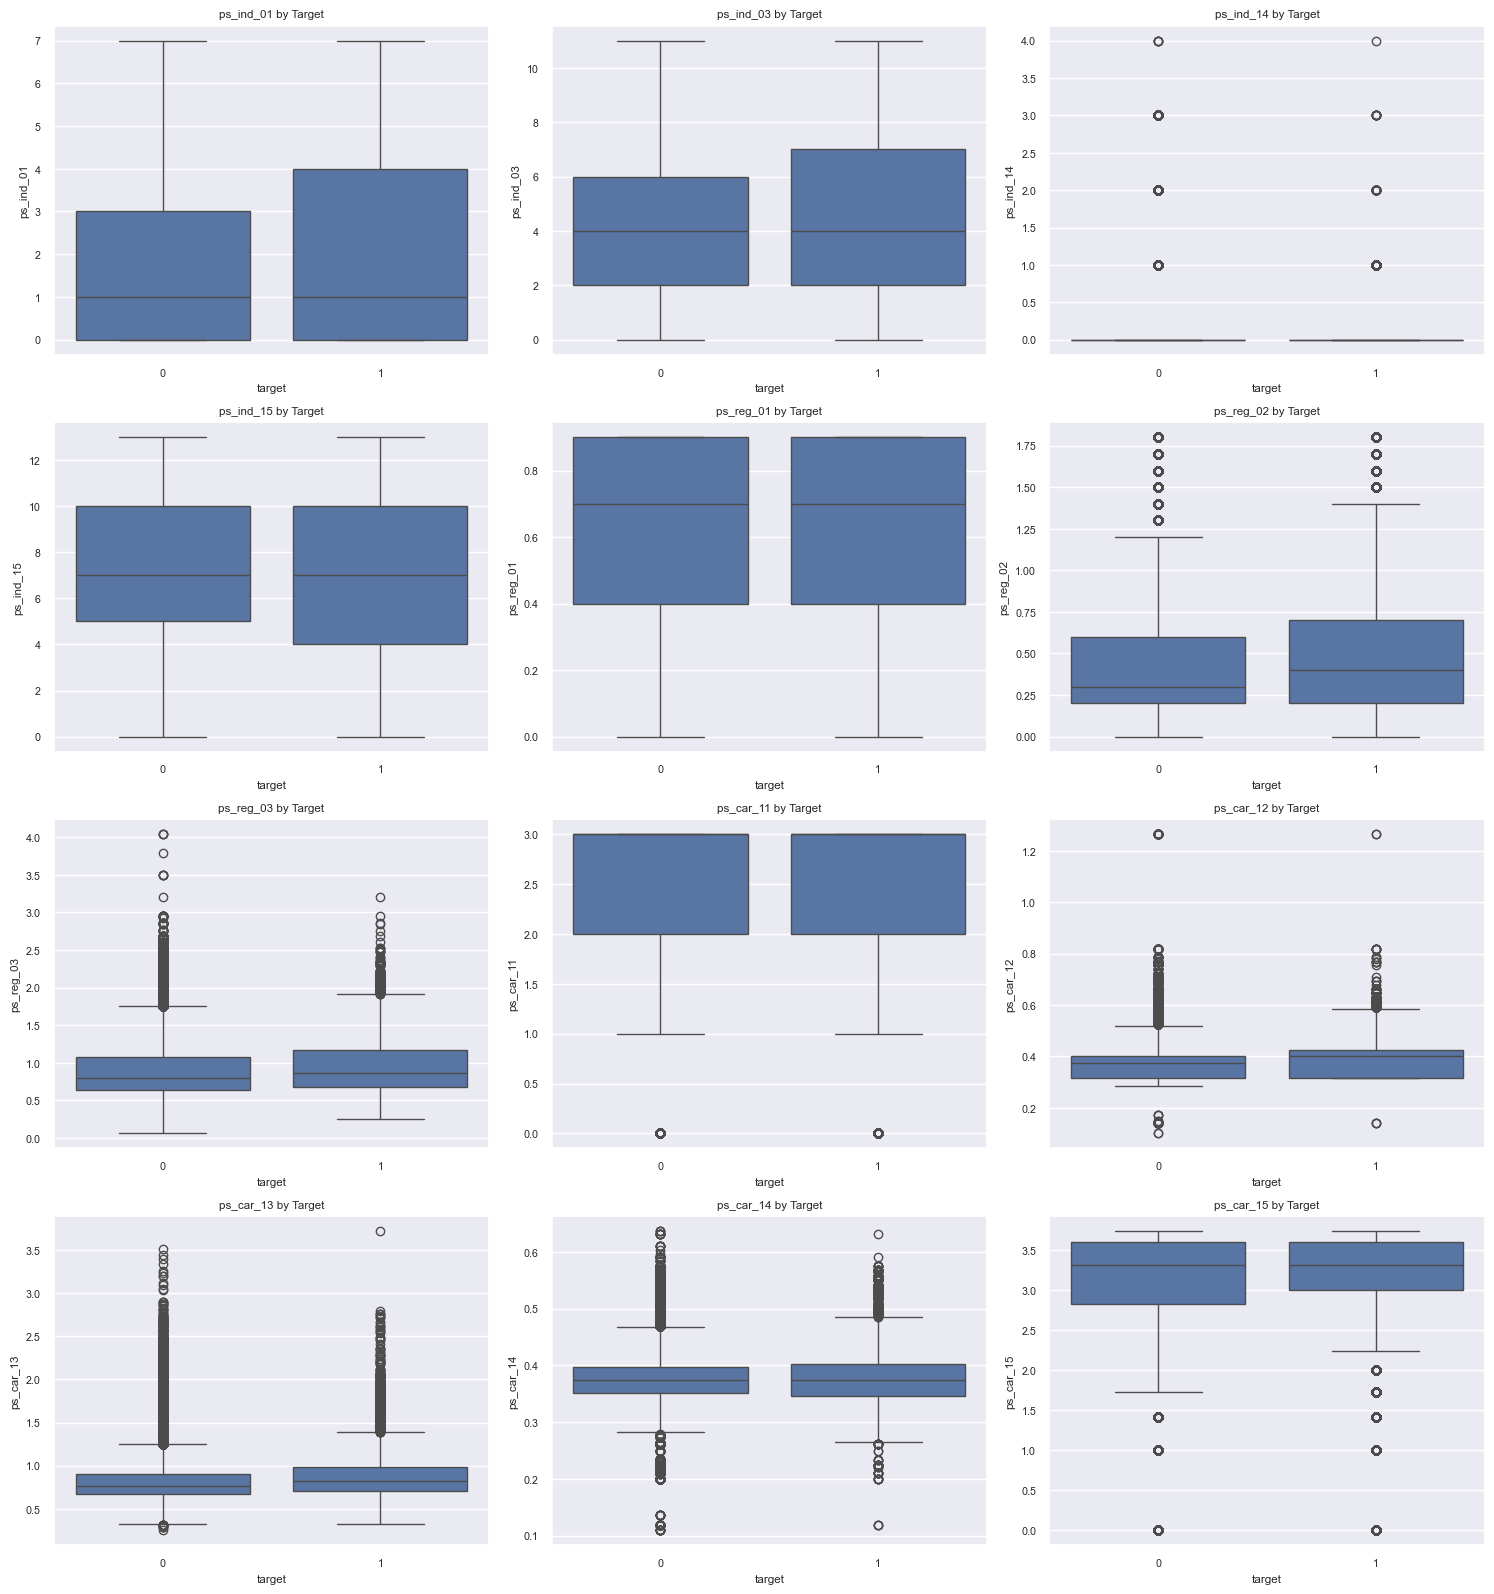

In [39]:
def plot_boxplots(df, features, ncols=3):
    """绘制箱线图"""
    nrows = (len(features) - 1) // ncols + 1
    plt.figure(figsize=(ncols * 5, nrows * 4))
    
    for i, feature in enumerate(features, 1):
        plt.subplot(nrows, ncols, i)
        sns.boxplot(data=df[df[feature] != -1], x='target', y=feature)
        plt.title(f'{feature} by Target')
        plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

# 执行箱线图分析
print("\n箱线图分析:")
print("Continuous Features Boxplots")
plot_boxplots(train_df, continuous_features)



连续特征分布分析:


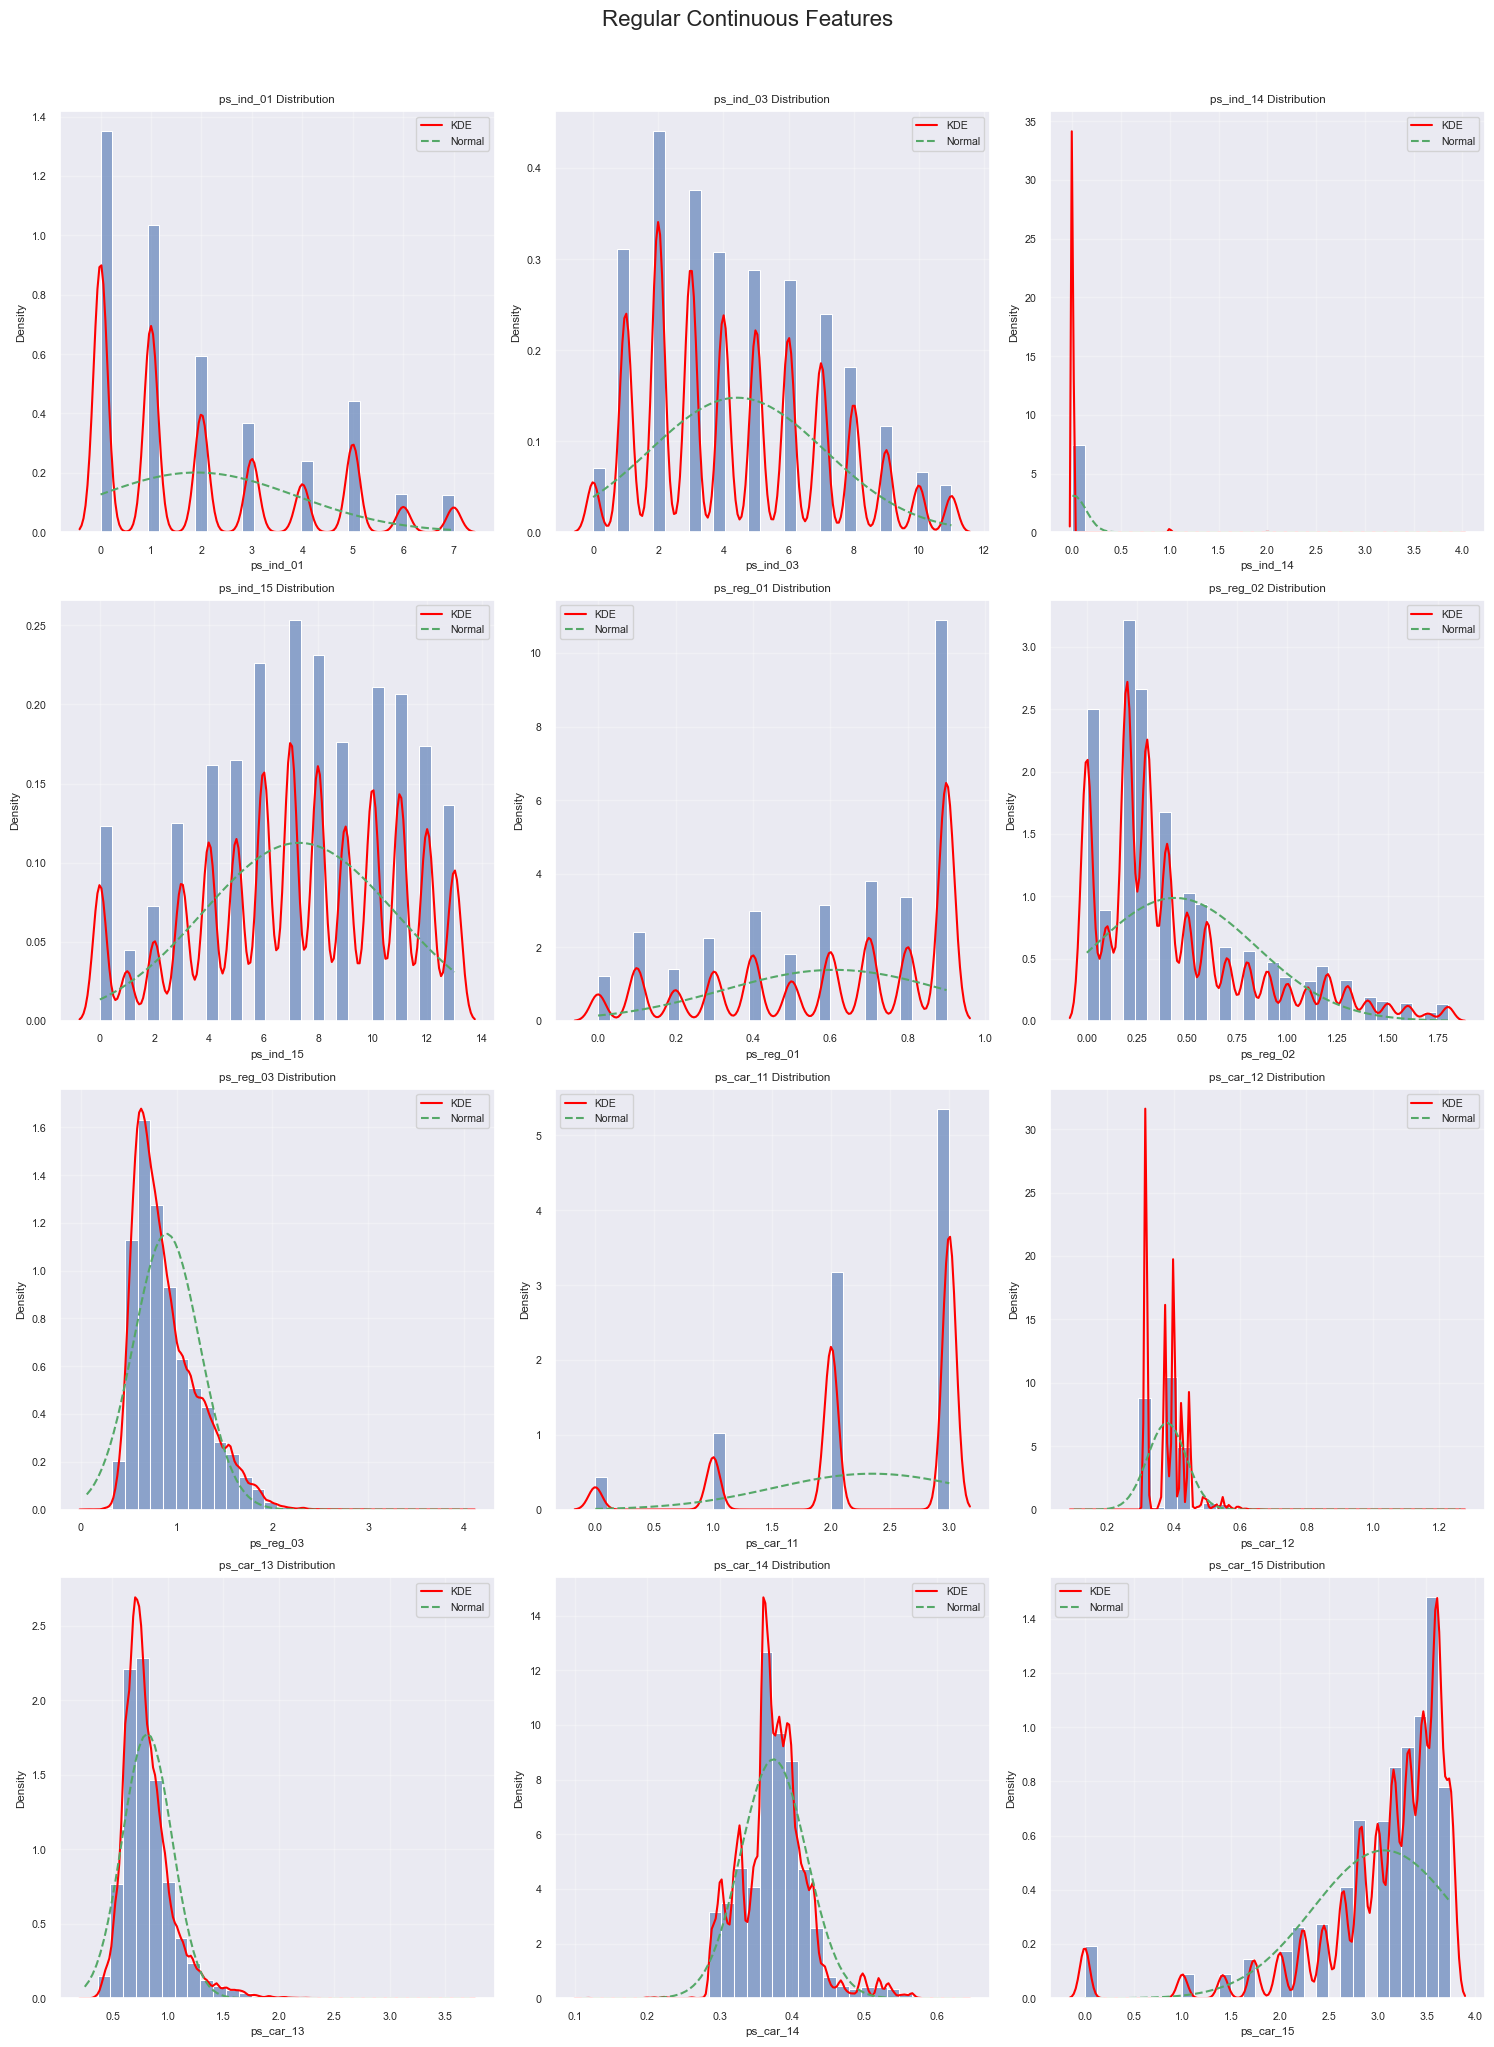


Regular Continuous Features - 基本统计信息:
           ps_ind_01      ps_ind_03      ps_ind_14      ps_ind_15  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        1.900378       4.423318       0.012451       7.299922   
std         1.983789       2.699902       0.127545       3.546042   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       2.000000       0.000000       5.000000   
50%         1.000000       4.000000       0.000000       7.000000   
75%         3.000000       6.000000       0.000000      10.000000   
max         7.000000      11.000000       4.000000      13.000000   

           ps_reg_01      ps_reg_02      ps_reg_03      ps_car_11  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.610991       0.439184       0.551102       2.346072   
std         0.287643       0.404264       0.793506       0.832548   
min         0.000000       0.000000      -1.000000      -1.0000

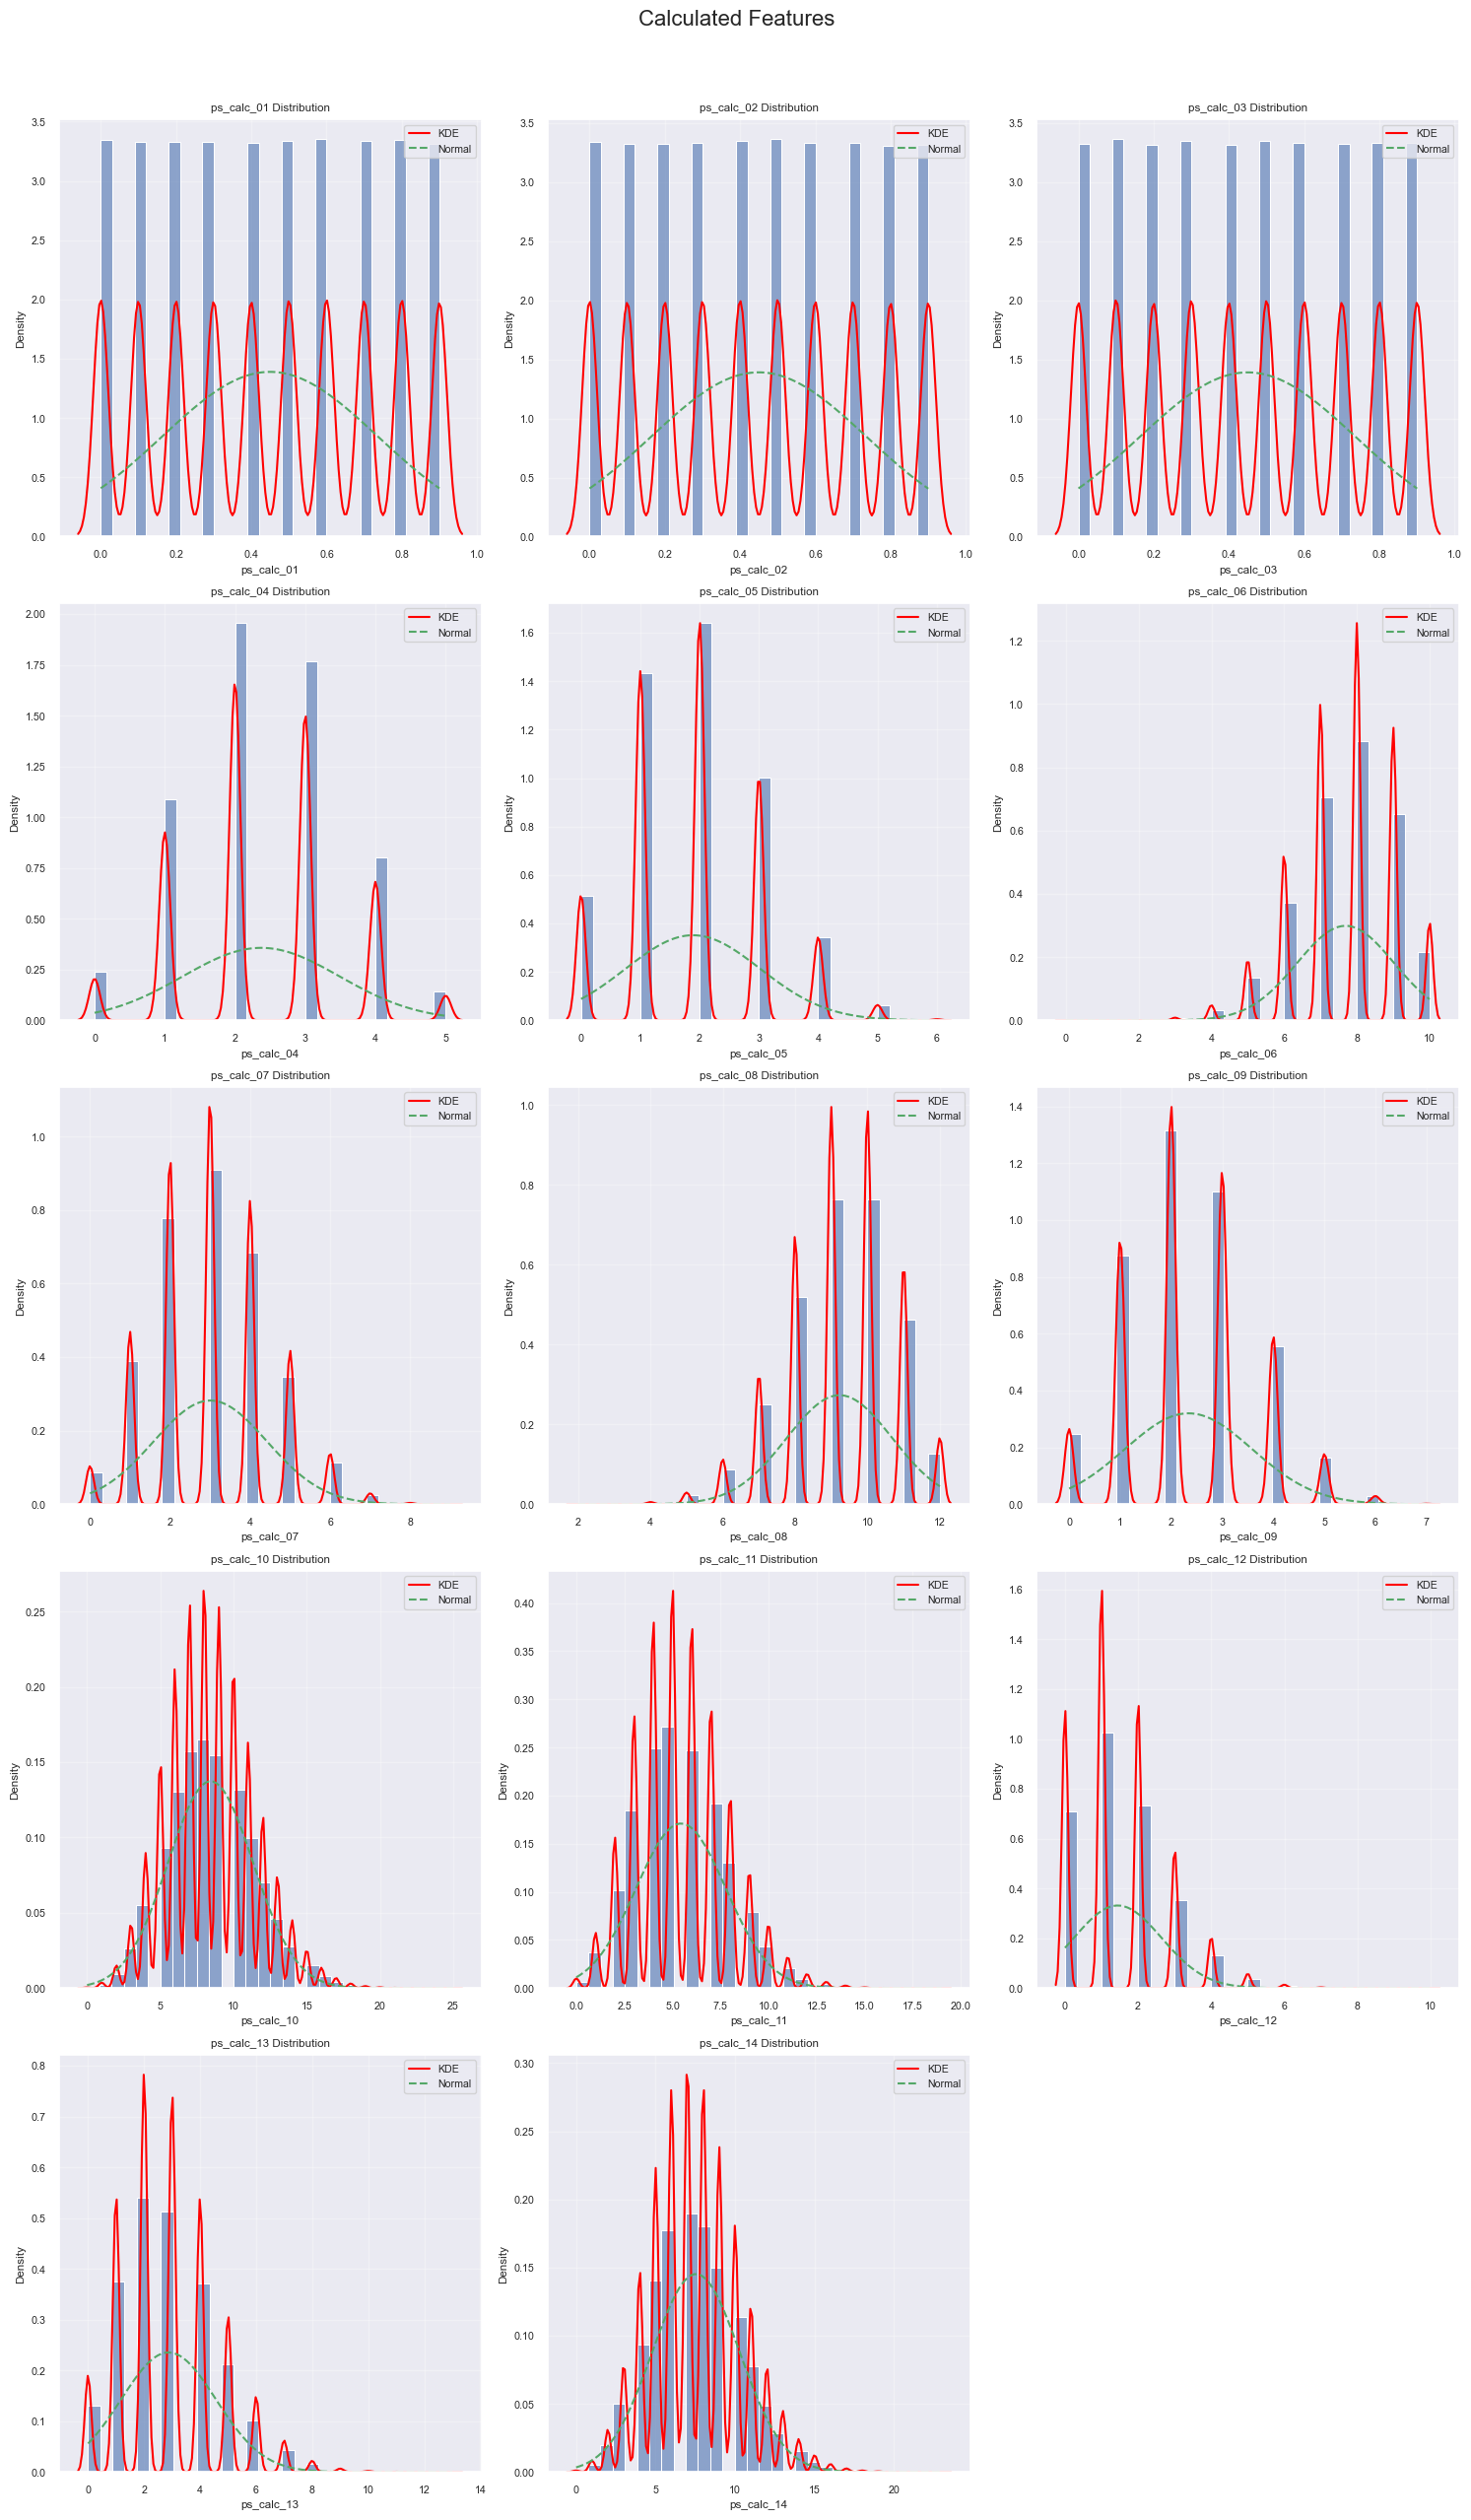


Calculated Features - 基本统计信息:
          ps_calc_01     ps_calc_02     ps_calc_03     ps_calc_04  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        0.449756       0.449589       0.449849       2.372081   
std         0.287198       0.286893       0.287153       1.117219   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.200000       0.200000       0.200000       2.000000   
50%         0.500000       0.400000       0.500000       2.000000   
75%         0.700000       0.700000       0.700000       3.000000   
max         0.900000       0.900000       0.900000       5.000000   

          ps_calc_05     ps_calc_06     ps_calc_07     ps_calc_08  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        1.885886       7.689445       3.005823       9.225904   
std         1.134927       1.334312       1.414564       1.459672   
min         0.000000       0.000000       0.000000       2.000000   
25

In [40]:
def analyze_continuous_features(df, continuous_features, calc_features):
    """分析连续特征的分布"""
    # 将连续特征分为calc和其他
    other_continuous = [f for f in continuous_features if f not in calc_features]
    
    # 分别分析两类特征
    for feature_set, title in [(other_continuous, "Regular Continuous Features"), 
                             (calc_features, "Calculated Features")]:
        nrows = (len(feature_set) - 1) // 3 + 1
        fig = plt.figure(figsize=(15, 5*nrows))
        
        for i, feature in enumerate(feature_set, 1):
            plt.subplot(nrows, 3, i)
            
            # 绘制直方图和正态分布曲线
            sns.histplot(data=df[df[feature] != -1], x=feature, bins=30, stat='density', alpha=0.6)
            
            # 添加核密度估计曲线
            sns.kdeplot(data=df[df[feature] != -1], x=feature, color='red', label='KDE')
            
            # 添加正态分布拟合曲线
            data = df[df[feature] != -1][feature]
            mu = data.mean()
            sigma = data.std()
            x = np.linspace(data.min(), data.max(), 100)
            p = stats.norm.pdf(x, mu, sigma)
            plt.plot(x, p, 'g--', label='Normal')
            
            plt.title(f'{feature} Distribution')
            plt.legend()
            plt.grid(True, alpha=0.3)
        
        plt.suptitle(title, y=1.02, fontsize=16)
        plt.tight_layout()
        plt.show()
        
        # 打印基本统计息
        print(f"\n{title} - 基本统计信息:")
        print(df[feature_set].describe())

# 在执行箱线图分析之后，数据预处理之前调用此函数
print("\n连续特征分布分析:")
analyze_continuous_features(train_df, continuous_features, calc_features)


# 1.5 总结统计信息

In [41]:
def print_summary_stats():
    """打印总结统计信息"""
    print("\n总结统计信息:")
    
    # 目标变量分布
    target_dist = train_df['target'].value_counts(normalize=True)
    print(f"\n类别不平衡比例: {target_dist[0]:.2%} vs {target_dist[1]:.2%}")
    
    # 缺失值情况
    missing_count = (train_df == -1).sum().sum()
    print(f"总缺失值数量: {missing_count}")
    print(f"缺值比例: {missing_count/(train_df.shape[0]*train_df.shape[1]):.2%}")
    
    # 特征重要性初步评估（基于与目标变量的相关性）
    correlations = []
    for col in train_df.columns:
        if col not in ['id', 'target']:
            corr = np.corrcoef(train_df[col], train_df['target'])[0,1]
            correlations.append((col, abs(corr)))
    
    correlations.sort(key=lambda x: x[1], reverse=True)
    print("\n与目标变量相关性最高的特征:")
    for feature, corr in correlations[:10]:
        print(f"{feature}: {corr:.4f}")

# 执行总结统计
print_summary_stats()



总结统计信息:

类别不平衡比例: 96.36% vs 3.64%
总缺失值数量: 846458
缺值比例: 2.41%

与目标变量相关性最高的特征:
ps_car_13: 0.0539
ps_car_12: 0.0388
ps_ind_17_bin: 0.0371
ps_car_07_cat: 0.0364
ps_reg_02: 0.0348
ps_ind_07_bin: 0.0342
ps_ind_06_bin: 0.0340
ps_car_04_cat: 0.0329
ps_car_03_cat: 0.0324
ps_car_02_cat: 0.0315


# 2.1 划分数据集

In [42]:
# 在加载数据后，预处理之前添加数据集划分
print("\n划分训练集和测试集...")
train_df, val_df = train_test_split(train_df, test_size=0.3, random_state=42, stratify=train_df['target'])
print(f"训练集大小: {train_df.shape}")
print(f"验证集大小: {val_df.shape}")


划分训练集和测试集...
训练集大小: (416648, 59)
验证集大小: (178564, 59)


# 2.2 数据处理和缺失值填充

In [43]:
# 进行数据预处理
def preprocess_data(train_df, val_df):
    """数据预处理"""
    print("\n数据预处理:")
    
    # 分离特征和目标变量
    features = [col for col in train_df.columns if col not in ['id', 'target']]
    X_train = train_df[features].copy()
    y_train = train_df['target'].copy()
    X_val = val_df[features].copy()
    y_val = val_df['target'].copy()
    
    # 分别处理不同类型的特征
    binary_features = [col for col in features if '_bin' in col]
    categorical_features = [col for col in features if '_cat' in col]
    calc_features = [col for col in features if '_calc' in col]
    continuous_features = [col for col in features if col not in binary_features + categorical_features + calc_features]
    
    # 1. 处理二元特征
    for col in binary_features:
        # 对于二元特征，用众数填充
        mode_val = X_train[col].mode()[0]
        X_train[col] = X_train[col].replace(-1, mode_val)
        X_val[col] = X_val[col].replace(-1, mode_val)
    
    # 2. 处理分类特征
    for col in categorical_features:
        # 对于分类特征，将-1视为单独的类别
        X_train[col] = X_train[col].astype('category')
        X_val[col] = X_val[col].astype('category')
    
    # 3. 处理连续特征
    scaler = StandardScaler()
    
    # 分别处理calc特征和其他连续特征
    for col in continuous_features:
        if col in calc_features:
            # 对于calc特征，用-1填充（保持原样）
            continue
        else:
            # 对于其他连续特征，用中位数填充并标准化
            median_val = X_train[col][X_train[col] != -1].median()
            X_train[col] = X_train[col].replace(-1, median_val)
            X_val[col] = X_val[col].replace(-1, median_val)
            
            # 标准化
            X_train[[col]] = scaler.fit_transform(X_train[[col]])
            X_val[[col]] = scaler.transform(X_val[[col]])
    
    print("处理后的数据形状:")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_val shape: {X_val.shape}")
    
    return X_train, X_val, y_train, y_val

# 执行预处理
X_train, X_val, y_train, y_val = preprocess_data(train_df, val_df)

# 计算少数类样本数量
n_minority = (y_train == 1).sum()

# 然后再进GAN相关操作
minority_mask = y_train == 1
X_minority = X_train[minority_mask]


数据预处理:
处理后的数据形状:
X_train shape: (416648, 57)
X_val shape: (178564, 57)


# 2.3 使用GAN来处理不平衡问题


使用GAN处理不平衡数据...
开始训练GAN...
Epoch [10/200]
D_loss: 0.0001, G_loss: 10.0744
Epoch [20/200]
D_loss: 0.0000, G_loss: 13.6571
Epoch [30/200]
D_loss: 0.0000, G_loss: 16.7731
Epoch [40/200]
D_loss: 0.0000, G_loss: 18.0451
Epoch [50/200]
D_loss: 0.0000, G_loss: 19.9778
Epoch [60/200]
D_loss: 0.0000, G_loss: 23.1513
Epoch [70/200]
D_loss: 0.0000, G_loss: 25.4553
Epoch [80/200]
D_loss: 0.0000, G_loss: 26.6099
Epoch [90/200]
D_loss: 0.0000, G_loss: 24.4346
Epoch [100/200]
D_loss: 0.0000, G_loss: 26.2176
Epoch [110/200]
D_loss: 0.0000, G_loss: 28.6053
Epoch [120/200]
D_loss: 0.0000, G_loss: 31.0022
Epoch [130/200]
D_loss: 0.0000, G_loss: 33.5336
Epoch [140/200]
D_loss: 0.0000, G_loss: 32.2923
Epoch [150/200]
D_loss: 0.0000, G_loss: 36.4583
Epoch [160/200]
D_loss: 0.0000, G_loss: 35.1427
Epoch [170/200]
D_loss: 0.0000, G_loss: 37.4643
Epoch [180/200]
D_loss: 0.0000, G_loss: 32.1240
Epoch [190/200]
D_loss: 0.0000, G_loss: 37.4423
Epoch [200/200]
D_loss: 0.0000, G_loss: 35.8896


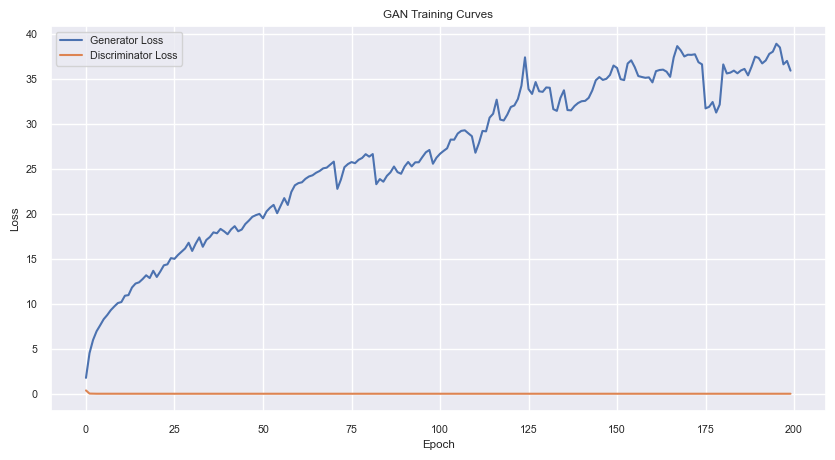


评估生成的样本...


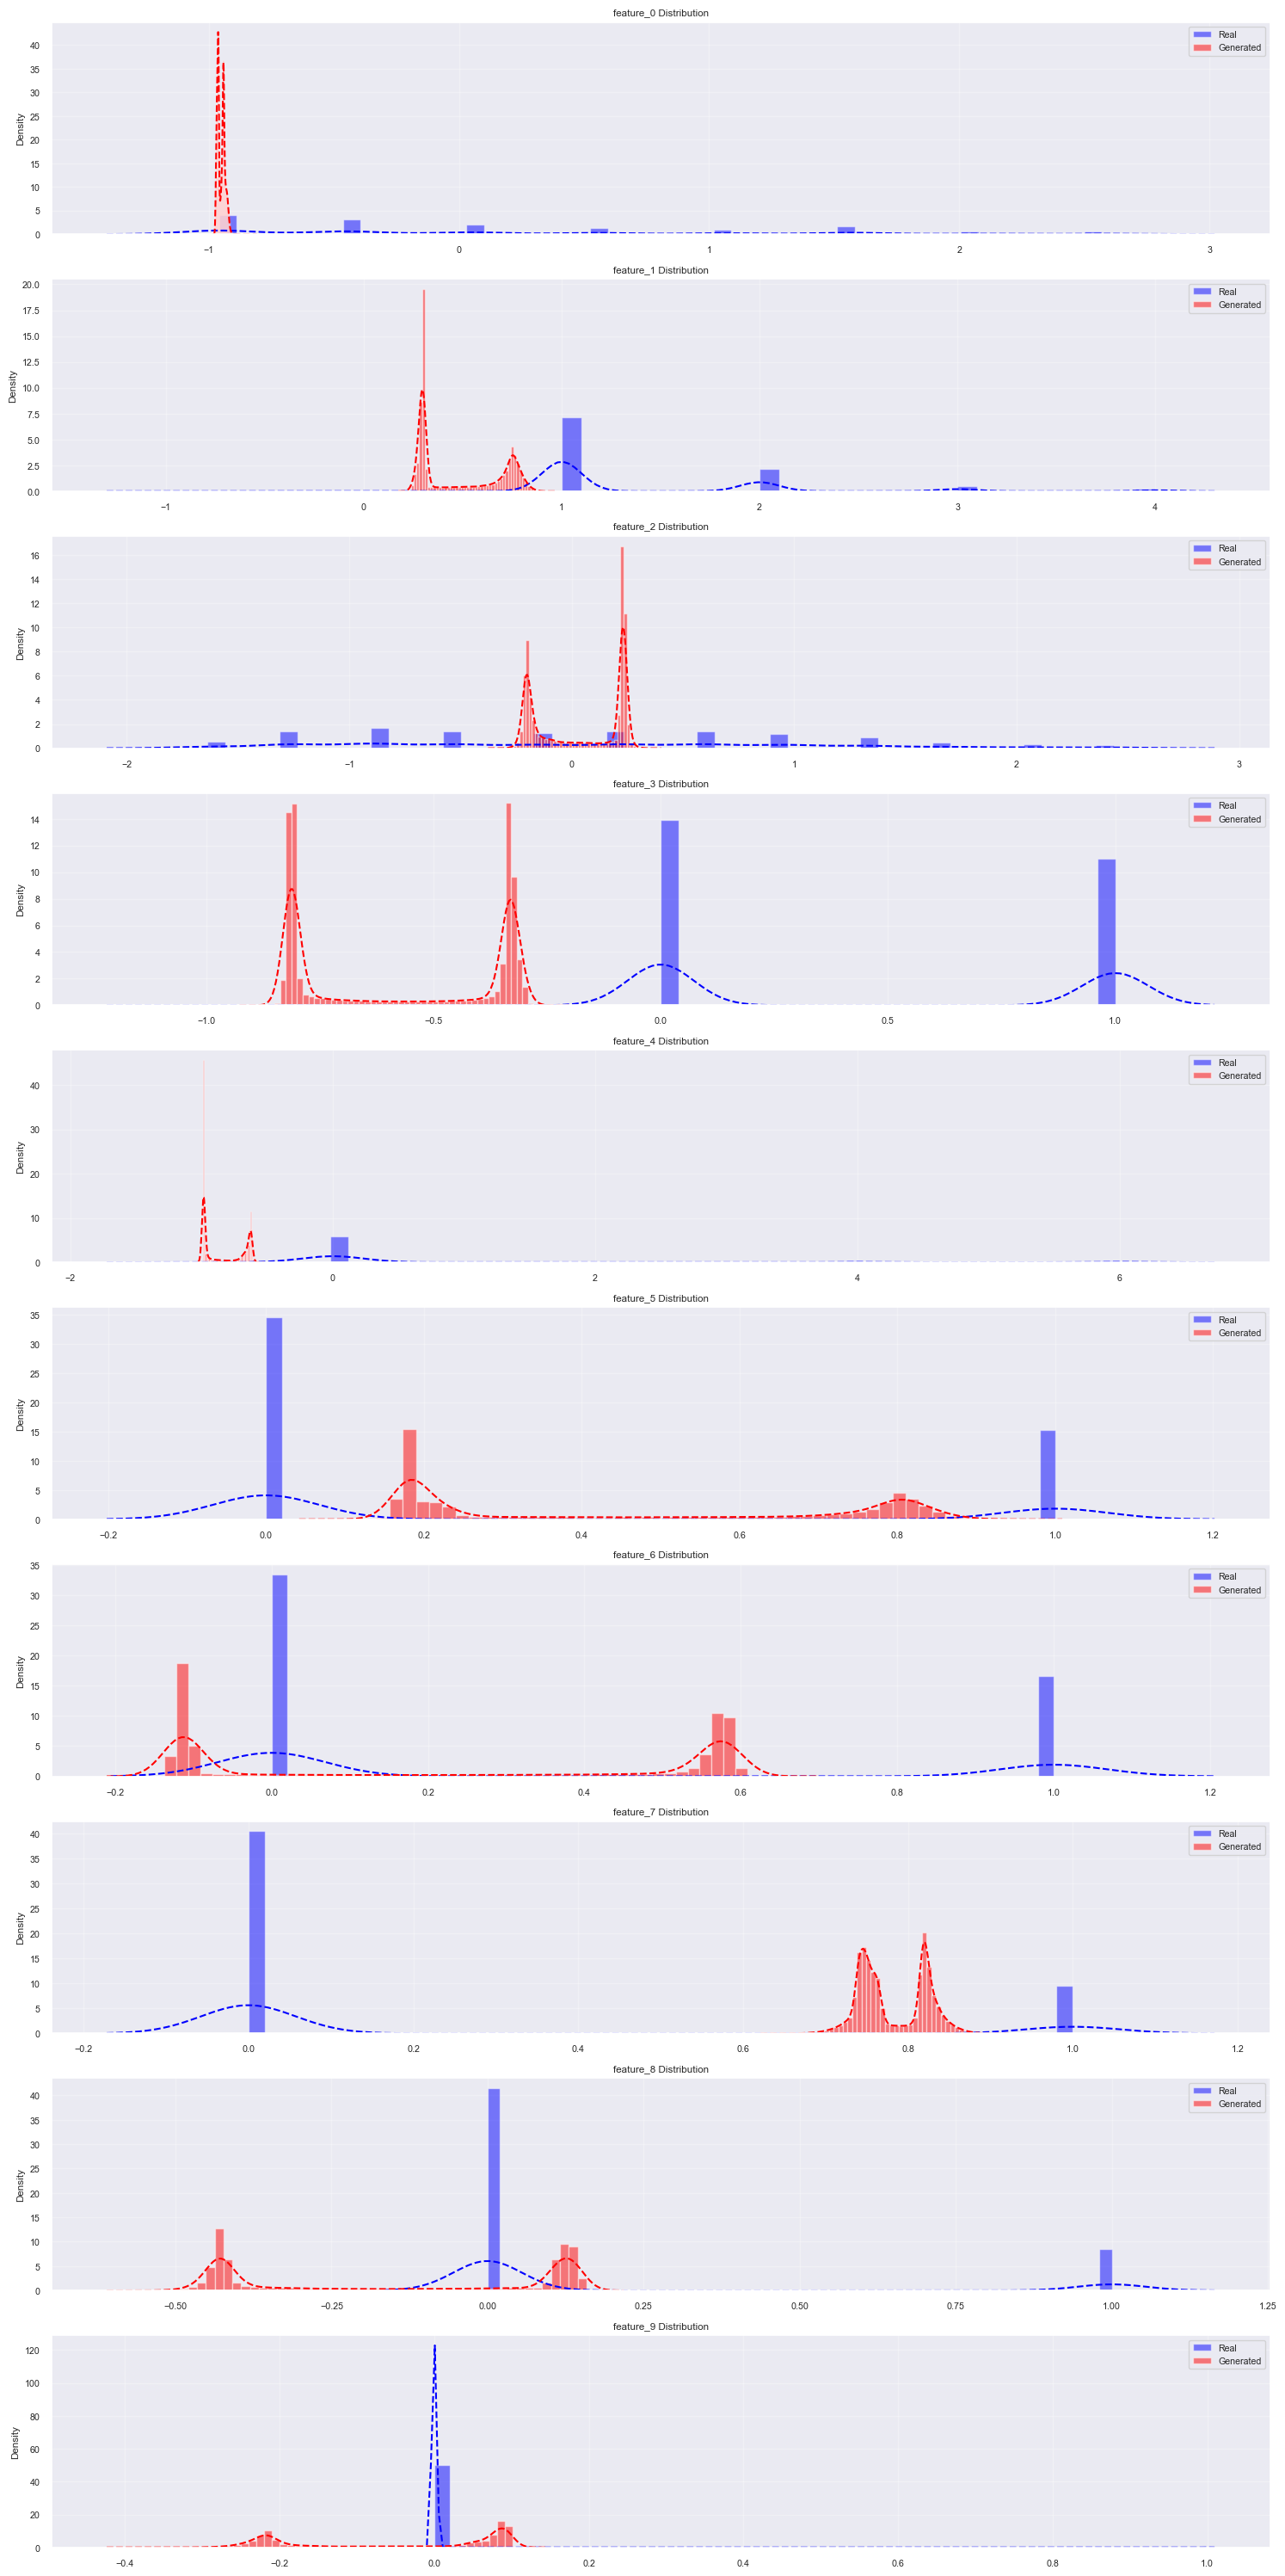


可视化数据分布对比...


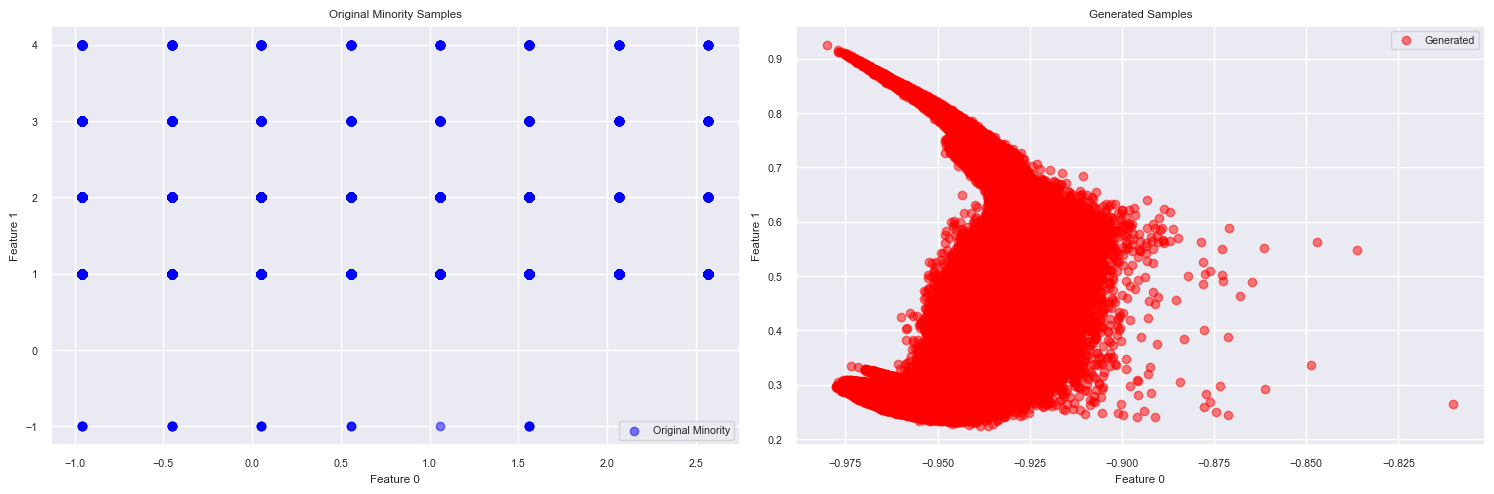


平衡后的数据分布:
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os

class InsuranceDataset(Dataset):
    """自定义数据集"""
    def __init__(self, X, y=None):
        # 将DataFrame转换为numpy数组
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        self.X = torch.FloatTensor(X)
        
        if y is not None:
            if isinstance(y, pd.Series):
                y = y.to_numpy()
            self.y = torch.FloatTensor(y)
        else:
            self.y = None
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        return self.X[idx]

class Generator(nn.Module):
    """生成器网络"""
    def __init__(self, latent_dim, output_dim, hidden_dim=256):
        super(Generator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            
            nn.Linear(hidden_dim, hidden_dim * 2),
            nn.BatchNorm1d(hidden_dim * 2),
            nn.ReLU(),
            
            nn.Linear(hidden_dim * 2, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            
            nn.Linear(hidden_dim, output_dim),
            nn.Tanh()
        )
        
    def forward(self, x):
        return self.model(x)

class Discriminator(nn.Module):
    """判别器网络"""
    def __init__(self, input_dim, hidden_dim=256):
        super(Discriminator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            
            nn.Linear(hidden_dim // 2, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.model(x)
    

class InsuranceGAN:
    def __init__(self, input_dim, latent_dim=100, hidden_dim=256):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
        # Generator和Discriminator
        self.generator = Generator(latent_dim, input_dim, hidden_dim).to(self.device)
        self.discriminator = Discriminator(input_dim, hidden_dim).to(self.device)
        
        # Optimizers
        self.g_optimizer = optim.Adam(self.generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
        self.d_optimizer = optim.Adam(self.discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
        
        # Loss tracking
        self.G_losses = []
        self.D_losses = []
        
        # 创保存目录
        if not os.path.exists('gan_results'):
            os.makedirs('gan_results')
    
    def train(self, X, epochs=200, batch_size=64):
        """训练GAN"""
        dataset = InsuranceDataset(X)
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        criterion = nn.BCELoss()
        
        print("开始训练GAN...")
        for epoch in range(epochs):
            g_losses = []
            d_losses = []
            
            for batch_data in dataloader:
                batch_size = len(batch_data)
                real_data = batch_data.to(self.device)
                
                # 训练判别器
                self.d_optimizer.zero_grad()
                label_real = torch.ones(batch_size, 1).to(self.device)
                label_fake = torch.zeros(batch_size, 1).to(self.device)
                
                output_real = self.discriminator(real_data)
                d_loss_real = criterion(output_real, label_real)
                
                noise = torch.randn(batch_size, self.latent_dim).to(self.device)
                fake_data = self.generator(noise)
                output_fake = self.discriminator(fake_data.detach())
                d_loss_fake = criterion(output_fake, label_fake)
                
                d_loss = d_loss_real + d_loss_fake
                d_loss.backward()
                self.d_optimizer.step()
                
                # 训练生成器
                self.g_optimizer.zero_grad()
                output_fake = self.discriminator(fake_data)
                g_loss = criterion(output_fake, label_real)
                
                g_loss.backward()
                self.g_optimizer.step()
                
                g_losses.append(g_loss.item())
                d_losses.append(d_loss.item())
            
            self.G_losses.append(np.mean(g_losses))
            self.D_losses.append(np.mean(d_losses))
            
            if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{epochs}]')
                print(f'D_loss: {np.mean(d_losses):.4f}, G_loss: {np.mean(g_losses):.4f}')
        
        # 在训练结束后绘制损失曲
        self._plot_training_curves()
    
    def _plot_training_curves(self):
        """绘制并保存训练曲线"""
        plt.figure(figsize=(10, 5))
        plt.plot(self.G_losses, label='Generator Loss')
        plt.plot(self.D_losses, label='Discriminator Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.title('GAN Training Curves')
        plt.savefig('gan_results/training_curves.png')
        plt.show()
    
    def evaluate_samples(self, real_data, generated_data, feature_names):
        """评估生成的样本"""
        # 确保数据是numpy数组格式
        if isinstance(real_data, pd.DataFrame):
            real_data = real_data.values
        if isinstance(generated_data, pd.DataFrame):
            generated_data = generated_data.values
        
        # 创建分布对比图
        n_features = min(real_data.shape[1], 10)  # 展示前10个特征
        plt.figure(figsize=(15, n_features*3))
        
        for i in range(n_features):
            plt.subplot(n_features, 1, i+1)
            
            # 绘制直方图和密度曲线
            plt.hist(real_data[:, i], bins=50, density=True, alpha=0.5, label='Real', color='blue')
            plt.hist(generated_data[:, i], bins=50, density=True, alpha=0.5, label='Generated', color='red')
            
            # 添加核密度估计曲线
            sns.kdeplot(data=real_data[:, i], color='blue', linestyle='--')
            sns.kdeplot(data=generated_data[:, i], color='red', linestyle='--')
            
            plt.title(f'{feature_names[i]} Distribution')
            plt.legend()
            plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('gan_results/distribution_comparison.png')
        plt.show()
        
        # 保存统计比较
        stats_comparison = []
        for i in range(real_data.shape[1]):
            real_mean = np.mean(real_data[:, i])
            real_std = np.std(real_data[:, i])
            gen_mean = np.mean(generated_data[:, i])
            gen_std = np.std(generated_data[:, i])
            
            stats_comparison.append({
                'feature': feature_names[i],
                'real_mean': real_mean,
                'real_std': real_std,
                'generated_mean': gen_mean,
                'generated_std': gen_std,
                'mean_diff_pct': abs(real_mean - gen_mean)/abs(real_mean) * 100 if real_mean != 0 else 0
            })
        
        pd.DataFrame(stats_comparison).to_csv('gan_results/statistical_comparison.csv', index=False)
    
    def generate_samples(self, n_samples):
        """生成新样本"""
        self.generator.eval()
        with torch.no_grad():
            noise = torch.randn(n_samples, self.latent_dim).to(self.device)
            generated_samples = self.generator(noise)
        return generated_samples.cpu().numpy()

# 在定义完 InsuranceGAN 类后直接使用：
print("\n使用GAN处理不平衡数据...")
minority_mask = y_train == 1
X_minority = X_train[minority_mask]
n_minority = len(X_minority)

# 初始化和训练GAN
gan = InsuranceGAN(input_dim=X_train.shape[1])
gan.train(X_minority, epochs=200, batch_size=32)

# 生成合成样本
n_synthetic = len(X_train) - 2 * n_minority
synthetic_samples = gan.generate_samples(n_synthetic)

# 评估生成的样本
print("\n评估生成的样本...")
feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]
gan.evaluate_samples(X_minority, synthetic_samples, feature_names)

# 可视化原始数据和生成数据的分布
print("\n可视化数据分布对比...")
plt.figure(figsize=(15, 5))

# 确保数据是numpy数组格式
if isinstance(X_minority, pd.DataFrame):
    X_minority = X_minority.values

# 选择两个特征进行可视化
feature1, feature2 = 0, 1  # 使用前两个特征
plt.subplot(121)
plt.scatter(X_minority[:, feature1], X_minority[:, feature2], 
           alpha=0.5, label='Original Minority', color='blue')
plt.title('Original Minority Samples')
plt.xlabel(f'Feature {feature1}')
plt.ylabel(f'Feature {feature2}')
plt.legend()

plt.subplot(122)
plt.scatter(synthetic_samples[:, feature1], synthetic_samples[:, feature2], 
           alpha=0.5, label='Generated', color='red')
plt.title('Generated Samples')
plt.xlabel(f'Feature {feature1}')
plt.ylabel(f'Feature {feature2}')
plt.legend()

plt.tight_layout()
plt.savefig('gan_results/samples_comparison.png')
plt.show()

# 合并原始数据和生成的数据
X_balanced = np.vstack([X_train, synthetic_samples])
y_balanced = np.concatenate([y_train, np.ones(n_synthetic)])

# 打印类别分布
print("\n平衡后的数据分布:")
print(pd.Series(y_balanced).value_counts(normalize=True))

# 2.4 GAN处理不平衡后，使用lightGBM进行分类预测


使用网格搜索和交叉验证训练分类器...

Training fold 1/5

Best parameters for fold 1:
{'num_leaves': 127, 'n_estimators': 100, 'min_child_samples': 20, 'learning_rate': 0.05, 'feature_fraction': 0.9, 'bagging_freq': 7, 'bagging_fraction': 0.9}
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0795705
Fold 1 AUC: 0.9866

Training fold 2/5

Best parameters for fold 2:
{'num_leaves': 127, 'n_estimators': 200, 'min_child_samples': 100, 'learning_rate': 0.01, 'feature_fraction': 0.7, 'bagging_freq': 7, 'bagging_fraction': 0.8}
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[200]	valid_0's binary_logloss: 0.127696
Fold 2 AUC: 0.9862

Training fold 3/5

Best parameters for fold 3:
{'num_leaves': 31, 'n_estimators': 300, 'min_child_samples': 100, 'learning_rate': 0.01, 'feature_fraction': 0.7, 'bagging_freq': 3, 'bagging_fraction': 0.9}
Training until vali

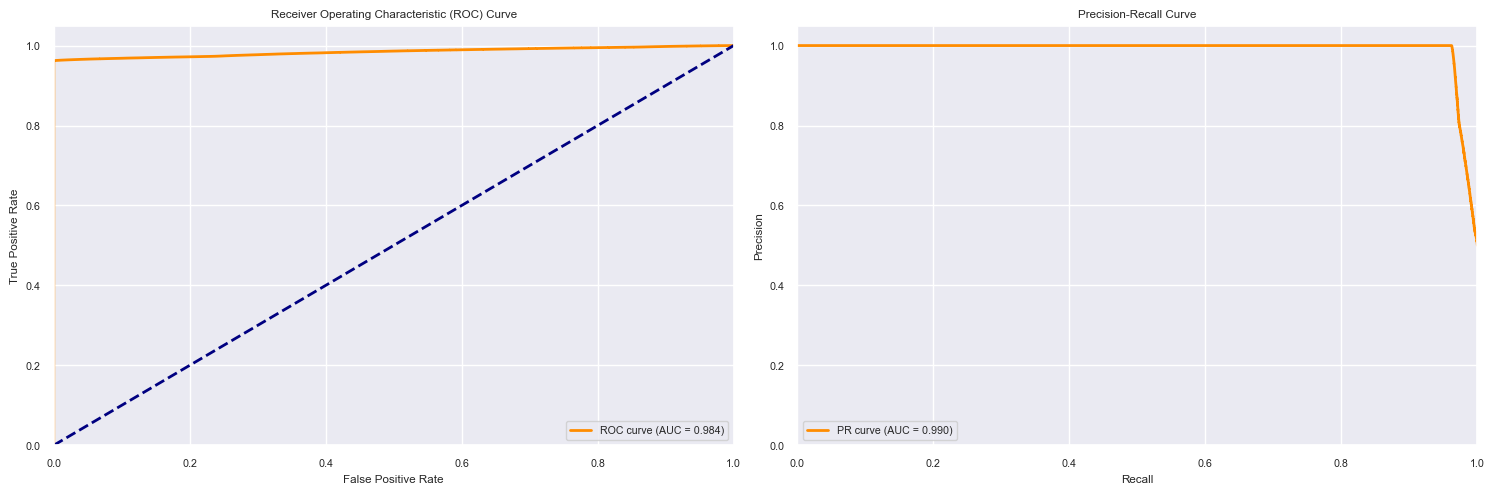


绘制特征重要性...


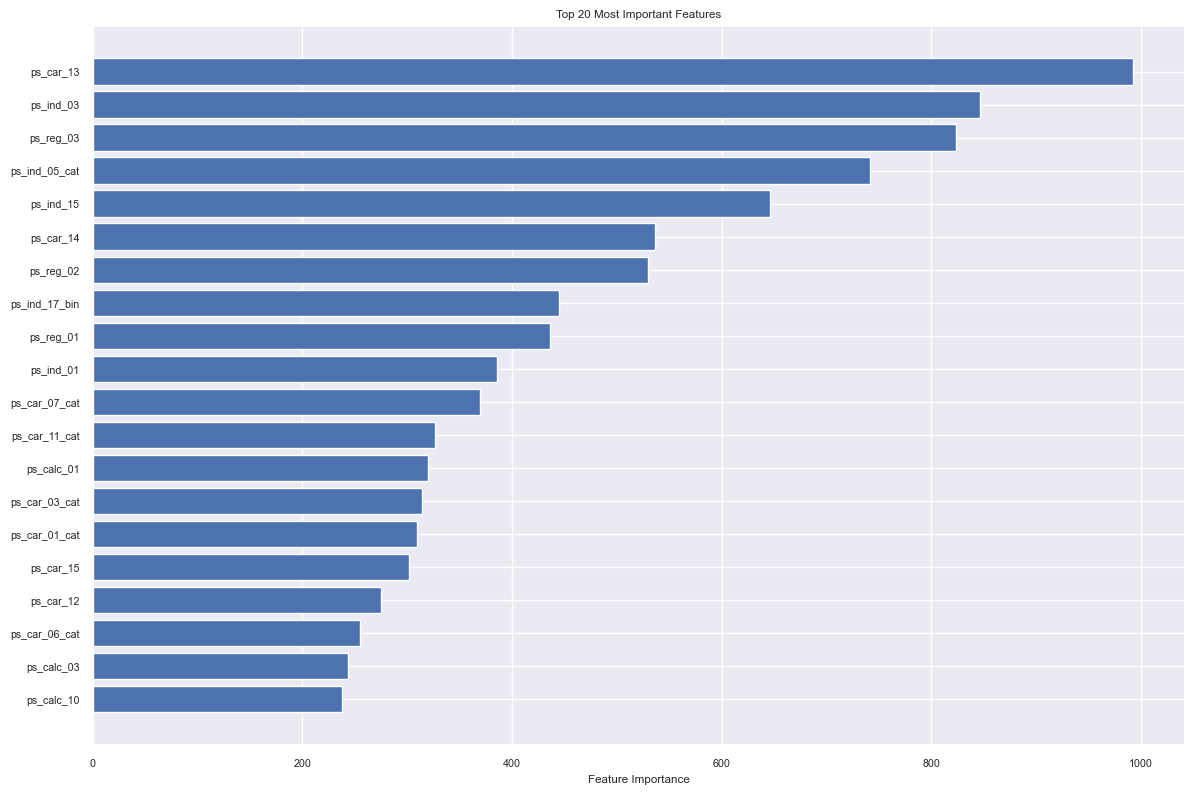

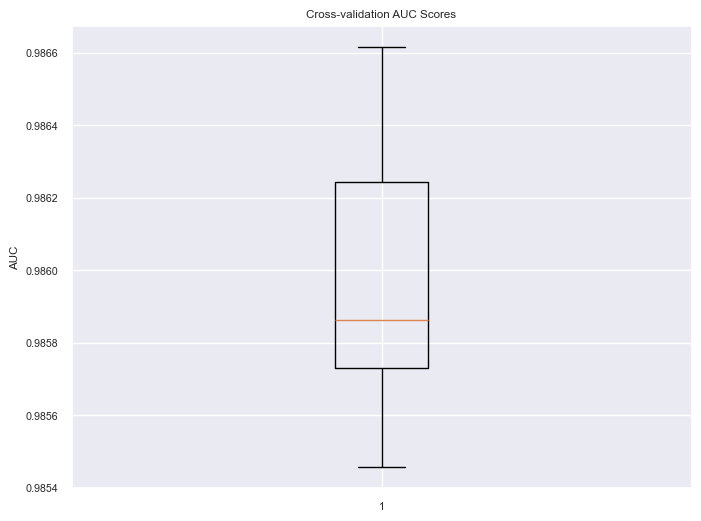


保存预测结果...

处理完成！结果已保存到results目录


In [50]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
from lightgbm import LGBMClassifier
import lightgbm as lgb
import os
from sklearn.metrics import roc_curve, precision_recall_curve, auc

def plot_performance_curves(y_true, y_pred):
    """绘制ROC曲线和PR曲线"""
    plt.figure(figsize=(15, 5))
    
    # ROC曲线
    plt.subplot(121)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    
    # PR曲线
    plt.subplot(122)
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, color='darkorange', lw=2,
             label=f'PR curve (AUC = {pr_auc:.3f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    
    plt.tight_layout()
    plt.savefig('results/performance_curves.png')
    plt.show()

def plot_feature_importance(feature_importance_df, feature_names=None):
    """绘制特征重要性"""
    # 创建特征重要性DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance_df
    })
    
    # 按重要性降序排序
    importance_df = importance_df.sort_values('importance', ascending=False)
    
    # 取前20个特征
    top_20 = importance_df.head(20)
    
    # 创建图表
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(top_20)), top_20['importance'])
    plt.yticks(range(len(top_20)), top_20['feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 20 Most Important Features')
    plt.gca().invert_yaxis()  # 让最重要的特征显示在顶部
    plt.tight_layout()
    plt.savefig('results/feature_importance.png')
    plt.show()

def train_classifier_with_cv(X, y, X_val, y_val, n_splits=5):
    """使用交叉验证训练分类器"""
    # 创建保存结果的目录
    if not os.path.exists('results'):
        os.makedirs('results')
    
    # 初始化结果数组
    oof_pred = np.zeros(len(X))
    val_pred = np.zeros(len(X_val))  # 验证集预测结果
    feature_importance = np.zeros(X.shape[1])
    cv_scores = []  # 添加这行，初始化cv_scores列表
    
    # 交叉验证训练
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        print(f"\nTraining fold {fold}/{n_splits}")
        
        X_train, X_val_fold = X[train_idx], X[val_idx]
        y_train, y_val_fold = y[train_idx], y[val_idx]
        
        # 初始化基础模型
        base_model = LGBMClassifier(
            objective='binary',
            metric='auc',
            boosting_type='gbdt',
            verbose=-1
        )
        
        # 定义评分器
        auc_scorer = make_scorer(roc_auc_score)
        
        # 随机搜索最佳参数
        random_search = RandomizedSearchCV(
            estimator=base_model,
            param_distributions=param_distributions,
            n_iter=20,  # 随机尝试20组参数
            scoring=auc_scorer,
            cv=3,  # 内部交叉验证折数
            verbose=0,
            random_state=42,
            n_jobs=-1  # 使用所有CPU核心
        )
        
        # 在训练集上进行参数搜索
        random_search.fit(X_train, y_train)
        
        print(f"\nBest parameters for fold {fold}:")
        print(random_search.best_params_)
        
        # 使用最佳参数训练模型
        best_model = LGBMClassifier(**random_search.best_params_)
        best_model.fit(
            X_train, y_train,
            eval_set=[(X_val_fold, y_val_fold)],
            callbacks=[lgb.early_stopping(100)],  # 修改这里
        )
        # 预测
        oof_pred[val_idx] = best_model.predict_proba(X_val_fold)[:, 1]
        val_pred += best_model.predict_proba(X_val)[:, 1] / n_splits
        
        # 记录特征重要性
        feature_importance += best_model.feature_importances_ / n_splits
        
        # 计算并保存当前折的性能
        fold_auc = roc_auc_score(y_val_fold, oof_pred[val_idx])
        cv_scores.append(fold_auc)
        print(f'Fold {fold} AUC: {fold_auc:.4f}')
    
    # 计算并打印交叉验证的统计信息
    mean_auc = np.mean(cv_scores)
    std_auc = np.std(cv_scores)
    print(f'\nCross-validation AUC: {mean_auc:.4f} (+/- {2*std_auc:.4f})')
    
    # 计算整体性能
    overall_auc = roc_auc_score(y, oof_pred)
    print(f'Overall AUC: {overall_auc:.4f}')
    
    # 保存特征重要性
    feature_importance_df = pd.DataFrame({
        'feature': range(X.shape[1]),
        'importance': feature_importance
    }).sort_values('importance', ascending=False)


    # 在计算整体性能后添加性能曲线可视化
    print("\n绘制性能曲线...")
    plot_performance_curves(y, oof_pred)
    
    # 修改特征重要性可视化
    print("\n绘制特征重要性...")
    feature_names = [col for col in train_df.columns if col not in ['id', 'target']]  # 使用原始特征名
    plot_feature_importance(feature_importance, feature_names)
    
    # 可视化交叉验证结果
    plt.figure(figsize=(8, 6))
    plt.boxplot(cv_scores)
    plt.title('Cross-validation AUC Scores')
    plt.ylabel('AUC')
    plt.savefig('results/cv_scores.png')
    plt.show()
    
    return oof_pred, val_pred, feature_importance

# 在train_classifier_with_cv函数之前添加参数空间定义
param_distributions = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.05, 0.1],
    'feature_fraction': [0.7, 0.8, 0.9],
    'bagging_fraction': [0.7, 0.8, 0.9],
    'bagging_freq': [3, 5, 7],
    'min_child_samples': [20, 50, 100],
    'n_estimators': [100, 200, 300]
}

# 使用平衡后的数据训练分类器
print("\n使用网格搜索和交叉验证训练分类器...")
oof_pred, val_pred, feature_importance = train_classifier_with_cv(
    X_balanced, y_balanced, X_val, y_val
)

# 保存预测结果
print("\n保存预测结果...")
submission = pd.DataFrame({
    'id': val_df['id'],  # 使用验证集的ID
    'target': val_pred
})
submission.to_csv('results/submission.csv', index=False)
print("\n处理完成！结果已保存到results目录")

# 不处理不平衡，直接使用lightGBM进行分类预测

In [51]:
# 直接使用预处理后的数据进行分类
print("\n开始训练分类器...")
print("使用原始数据（不平衡）进行训练")
print(f"训练集中正例比例: {(y_train == 1).mean():.3f}")
print(f"验证集中正例比例: {(y_val == 1).mean():.3f}")


开始训练分类器...
使用原始数据（不平衡）进行训练
训练集中正例比例: 0.036
验证集中正例比例: 0.036


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
import lightgbm as lgb
from lightgbm import LGBMClassifier
import os

class InsuranceClassifier:
    def __init__(self, n_splits=5):
        self.n_splits = n_splits
        # 创建结果目录
        if not os.path.exists('results_raw'):
            os.makedirs('results_raw')
            
    def prepare_data(self, train_path, test_size=0.3):
        """准备数据"""
        # 加载数据
        train_df = pd.read_csv(train_path)
        
        # 划分训练集和验证集
        train_df, val_df = train_test_split(
            train_df, 
            test_size=test_size, 
            random_state=42, 
            stratify=train_df['target']
        )
        
        return self.preprocess_data(train_df, val_df)
    
    def preprocess_data(self, train_df, val_df):
        """数据预处理"""
        # 分离特征和目标变量
        features = [col for col in train_df.columns if col not in ['id', 'target']]
        X_train = train_df[features].copy()
        y_train = train_df['target'].copy()
        X_val = val_df[features].copy()
        y_val = val_df['target'].copy()
        
        # 分类特征
        binary_features = [col for col in features if '_bin' in col]
        categorical_features = [col for col in features if '_cat' in col]
        calc_features = [col for col in features if '_calc' in col]
        continuous_features = [col for col in features 
                             if col not in binary_features + categorical_features + calc_features]
        
        # 1. 处理二元特征
        for col in binary_features:
            mode_val = X_train[col].mode()[0]
            X_train[col] = X_train[col].replace(-1, mode_val)
            X_val[col] = X_val[col].replace(-1, mode_val)
        
        # 2. 处理分类特征
        for col in categorical_features:
            X_train[col] = X_train[col].astype('category')
            X_val[col] = X_val[col].astype('category')
        
        # 3. 处理连续特征
        scaler = StandardScaler()
        for col in continuous_features:
            if col in calc_features:
                continue
            else:
                median_val = X_train[col][X_train[col] != -1].median()
                X_train[col] = X_train[col].replace(-1, median_val)
                X_val[col] = X_val[col].replace(-1, median_val)
                
                X_train[[col]] = scaler.fit_transform(X_train[[col]])
                X_val[[col]] = scaler.transform(X_val[[col]])
        
        return X_train, X_val, y_train, y_val
    
    def train_and_predict(self, X_train, X_val, y_train, y_val):
        """训练模型并预测"""
        # 初始化结果数组
        oof_pred = np.zeros(len(X_train))
        val_pred = np.zeros(len(X_val))
        feature_importance = np.zeros(X_train.shape[1])
        
        # 交叉验证训练
        skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=42)
        
        for fold, (train_idx, test_idx) in enumerate(skf.split(X_train, y_train), 1):
            print(f"\nTraining fold {fold}/{self.n_splits}")
            
            X_tr, X_te = X_train.iloc[train_idx], X_train.iloc[test_idx]
            y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]
            
            # 训练模型
            model = LGBMClassifier(
                objective='binary',
                metric='auc',
                boosting_type='gbdt',
                num_leaves=31,
                learning_rate=0.05,
                feature_fraction=0.9,
                bagging_fraction=0.8,
                bagging_freq=5,
                verbose=-1
            )
            
            model.fit(
                X_tr, y_tr,
                eval_set=[(X_te, y_te)],
                callbacks=[lgb.early_stopping(stopping_rounds=100)],
            )
            
            # 预测
            oof_pred[test_idx] = model.predict_proba(X_te)[:, 1]
            val_pred += model.predict_proba(X_val)[:, 1] / self.n_splits
            feature_importance += model.feature_importances_ / self.n_splits
            
            # 打印当前折的性能
            fold_auc = roc_auc_score(y_te, oof_pred[test_idx])
            print(f'Fold {fold} AUC: {fold_auc:.4f}')
        
        # 计算整体性能
        overall_auc = roc_auc_score(y_train, oof_pred)
        val_auc = roc_auc_score(y_val, val_pred)
        print(f'\nOverall CV AUC: {overall_auc:.4f}')
        print(f'Validation AUC: {val_auc:.4f}')
        
        # 绘制性能曲线
        self.plot_performance_curves(y_val, val_pred)
        
        # 绘制特征重要性
        self.plot_feature_importance(feature_importance, X_train.columns)
        
        return oof_pred, val_pred, feature_importance
    
    def plot_performance_curves(self, y_true, y_pred):
        """绘制ROC曲线和PR曲线"""
        plt.figure(figsize=(15, 5))
        
        # ROC曲线
        plt.subplot(121)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='darkorange', lw=2, 
                 label=f'ROC curve (AUC = {roc_auc:.3f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        
        # PR曲线
        plt.subplot(122)
        precision, recall, _ = precision_recall_curve(y_true, y_pred)
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, color='darkorange', lw=2,
                 label=f'PR curve (AUC = {pr_auc:.3f})')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc="lower left")
        
        plt.tight_layout()
        plt.savefig('results_raw/performance_curves.png')
        plt.close()
    
    def plot_feature_importance(self, importance, feature_names):
        """绘制特征重要性"""
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importance
        }).sort_values('importance', ascending=True)
        
        plt.figure(figsize=(10, 8))
        plt.barh(range(len(importance_df.tail(20))), 
                importance_df.tail(20)['importance'],
                align='center')
        plt.yticks(range(len(importance_df.tail(20))), 
                  importance_df.tail(20)['feature'])
        plt.xlabel('Feature Importance')
        plt.title('Top 20 Most Important Features')
        plt.tight_layout()
        plt.savefig('results_raw/feature_importance.png')
        plt.close()

def main():
    # 初始化分类器
    classifier = InsuranceClassifier()
    
    # 准备数据
    print("准备数据...")
    X_train, X_val, y_train, y_val = classifier.prepare_data('train.csv')
    
    # 打印类别分布
    print("\n类别分布:")
    print(f"训练集中正例比例: {(y_train == 1).mean():.3f}")
    print(f"验证集中正例比例: {(y_val == 1).mean():.3f}")
    
    # 训练和预测
    print("\n开始训练...")
    oof_pred, val_pred, feature_importance = classifier.train_and_predict(
        X_train, X_val, y_train, y_val
    )
    
    # 保存预测结果
    print("\n保存预测结果...")
    submission = pd.DataFrame({
        'id': X_val.index,
        'target': val_pred
    })
    submission.to_csv('results_raw/submission.csv', index=False)
    
    print("\n处理完成！结果已保存到results_raw目录")

if __name__ == "__main__":
    main()

准备数据...

类别分布:
训练集中正例比例: 0.036
验证集中正例比例: 0.036

开始训练...

Training fold 1/5
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[86]	valid_0's auc: 0.617795
Fold 1 AUC: 0.6178

Training fold 2/5
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[77]	valid_0's auc: 0.625292
Fold 2 AUC: 0.6253

Training fold 3/5
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[72]	valid_0's auc: 0.629791
Fold 3 AUC: 0.6298

Training fold 4/5
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[84]	valid_0's auc: 0.63399
Fold 4 AUC: 0.6340

Training fold 5/5
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[68]	valid_0's auc: 0.629644
Fold 5 AUC: 0.6296

Overall CV AUC: 0.6272
Validation AUC: 0.6357

保存预测结果...

处